# Loan Data and rate spread prediction

## Data Analysis and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('data/train_values.csv')
labels = pd.read_csv('data/train_labels.csv')

# Preprocessing the data

In [9]:
data['rate_spread'] = labels['rate_spread']

data.drop(['row_id'],axis=1,inplace=True)

In [10]:
#get the size of dataframe
print ("Rows     : " , data.shape[0])  #get number of rows/observations
print ("Columns  : " , data.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", data.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values (numerical) :\n\n", data.isnull().sum().sort_values(ascending=False))
print ("#"*40,"\nMissing values (categorical) :\n\n", (data == -1).sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing (numerical) :\n\n", round(data.isna().sum() / data.isna().count() * 100, 2)) # looking at columns with most Missing Values
print( "#"*40,"\nPercent of missing (categorical) :\n\n", round((data == -1).sum() / (data == -1).count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", data.nunique())  #  count of unique values

Rows     :  200000
Columns  :  23
######################################## 
 Features : 

 ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units', 'lender', 'co_applicant', 'Income_provided', 'rate_spread']
######################################## 
Missing values (numerical) :

 applicant_income                  10708
tract_to_msa_md_income_pct         2023
number_of_1_to_4_family_units      2016
number_of_owner-occupied_units     2012
minority_population_pct            1995
population                         1995
ffiecmedian_family_income          1985
loan_type                             0
Income_provided                       0
co_applicant                          0
le

We see that 7 columns have missing values. They are all census features (missing around 2000 values) and applicant_income missing almost 11000 values. We will deal with null values later on.

Here I am adding a boolean feature showing if applicant_income is provided or not. It will be interesting to compare the two groups. Finally transforming the co-applicant column to integer values instead of boolean.

In [11]:
data['Income_provided'] = np.where(data.applicant_income.isnull(), 0, 1)
data['co_applicant'] = np.where(data['co_applicant'] == True, 1, 0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_type                       200000 non-null  int64  
 1   property_type                   200000 non-null  int64  
 2   loan_purpose                    200000 non-null  int64  
 3   occupancy                       200000 non-null  int64  
 4   loan_amount                     200000 non-null  float64
 5   preapproval                     200000 non-null  int64  
 6   msa_md                          200000 non-null  int64  
 7   state_code                      200000 non-null  int64  
 8   county_code                     200000 non-null  int64  
 9   applicant_ethnicity             200000 non-null  int64  
 10  applicant_race                  200000 non-null  int64  
 11  applicant_sex                   200000 non-null  int64  
 12  applicant_income

<AxesSubplot: xlabel='loan_amount', ylabel='rate_spread'>

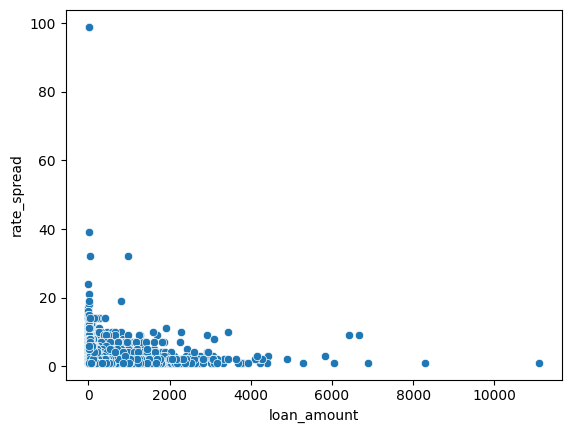

In [13]:
sns.scatterplot(data = data, x = 'loan_amount', y = 'rate_spread')

In [14]:
data.loan_amount.value_counts(bins = [0,500,1000,1500,2000,2500,3000,4000,100000])

(-0.001, 500.0]       196644
(500.0, 1000.0]         2803
(1000.0, 1500.0]         334
(1500.0, 2000.0]         110
(2000.0, 2500.0]          52
(2500.0, 3000.0]          21
(3000.0, 4000.0]          20
(4000.0, 100000.0]        16
Name: loan_amount, dtype: int64

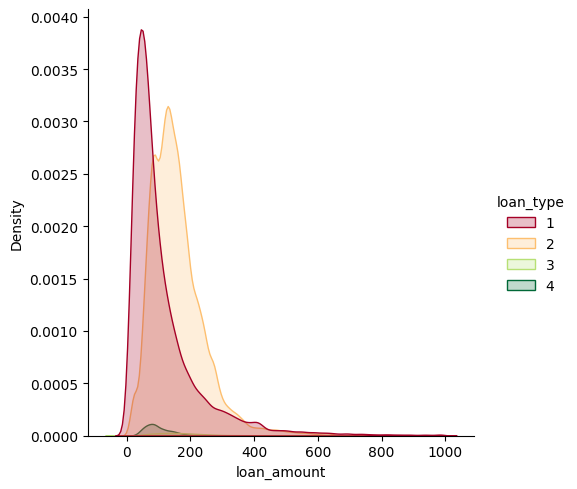

In [8]:
gt1 = (data.Income_provided == True) & (data.loan_amount < 1000)
sns.displot(data[gt1], x="loan_amount", hue="loan_type", kind="kde", fill=True, palette="RdYlGn")

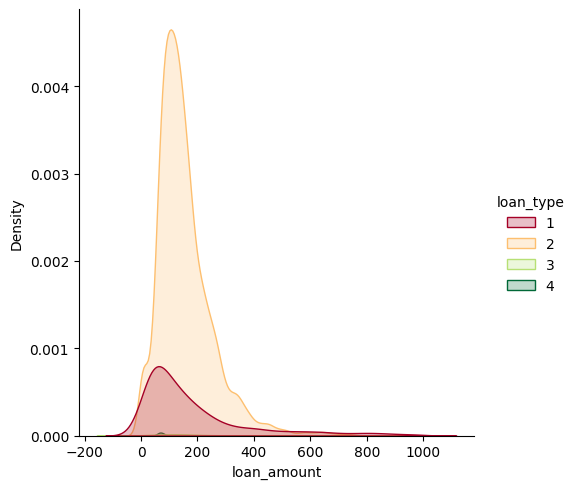

In [9]:
gt2 = (data.Income_provided == False) & (data.loan_amount < 1000)
sns.displot(data[gt2], x="loan_amount", hue="loan_type", kind="kde", fill=True, palette="RdYlGn")

When income is not provided it is mostly for FHA-insured houses and then for conventional loans. A much bigger difference is observed when income is not provided. The peak of the loan_type=2 distribution is bigger than the one for loan_type=1

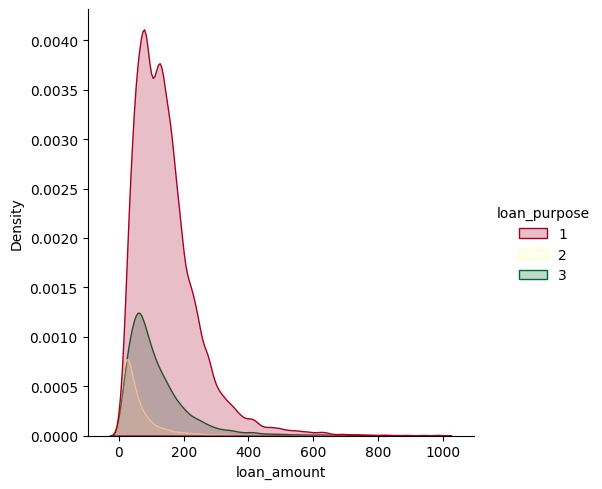

In [10]:
sns.displot(data[gt1], x="loan_amount", hue="loan_purpose", kind="kde", fill=True, palette="RdYlGn")

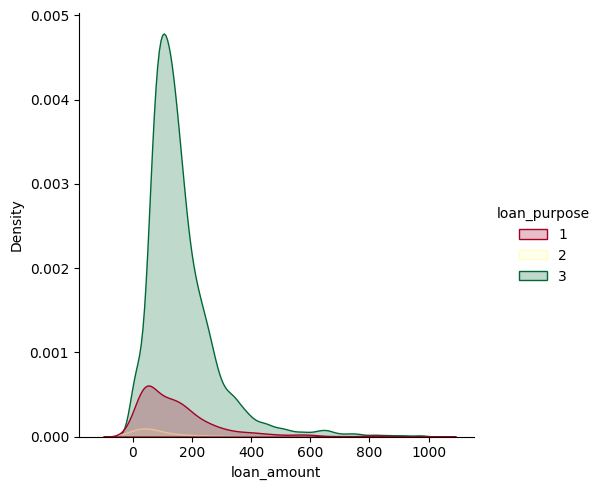

In [11]:
sns.displot(data[gt2], x="loan_amount", hue="loan_purpose", kind="kde", fill=True, palette="RdYlGn")

In [12]:
data.groupby('loan_purpose').apply(lambda x: x.isnull().mean()).T

loan_purpose,1,2,3
loan_type,0.000000,0.000000,0.000000
property_type,0.000000,0.000000,0.000000
loan_purpose,0.000000,0.000000,0.000000
occupancy,0.000000,0.000000,0.000000
loan_amount,0.000000,0.000000,0.000000
preapproval,0.000000,0.000000,0.000000
msa_md,0.000000,0.000000,0.000000
state_code,0.000000,0.000000,0.000000
county_code,0.000000,0.000000,0.000000
applicant_ethnicity,0.000000,0.000000,0.000000


When comparing the loan_purpose classes now, we see that when income is provided data is dominated by home purchase loans. However majority of loans that don't have income correspond to refinancing loans. 

/var/folders/b7/l9jj1js10h961nfk07cfv7qr0000gn/T/ipykernel_1178/65241848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data.applicant_income.isnull() & (data.loan_amount < 1500)].loan_amount)
/var/folders/b7/l9jj1js10h961nfk07cfv7qr0000gn/T/ipykernel_1178/65241848.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

<AxesSubplot: xlabel='loan_amount', ylabel='Density'>

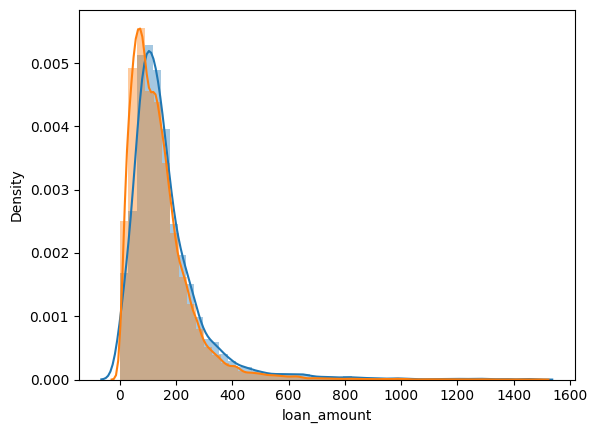

In [13]:
sns.distplot(data[data.applicant_income.isnull() & (data.loan_amount < 1500)].loan_amount)
sns.distplot(data[data.applicant_income.notnull() & (data.loan_amount < 1500)].loan_amount)

Excluding large outliers of loan_amount we see that there is not real difference between entries with or without applicant_income.

In [15]:
data["Income_group"] = pd.cut(x=data["applicant_income"],
                              bins=[0, 50, 140, 100000],
                              labels=["Lower", "Middle", "High"]
                             )

data['loan_income_ratio'] = data['loan_amount'] / data['applicant_income']

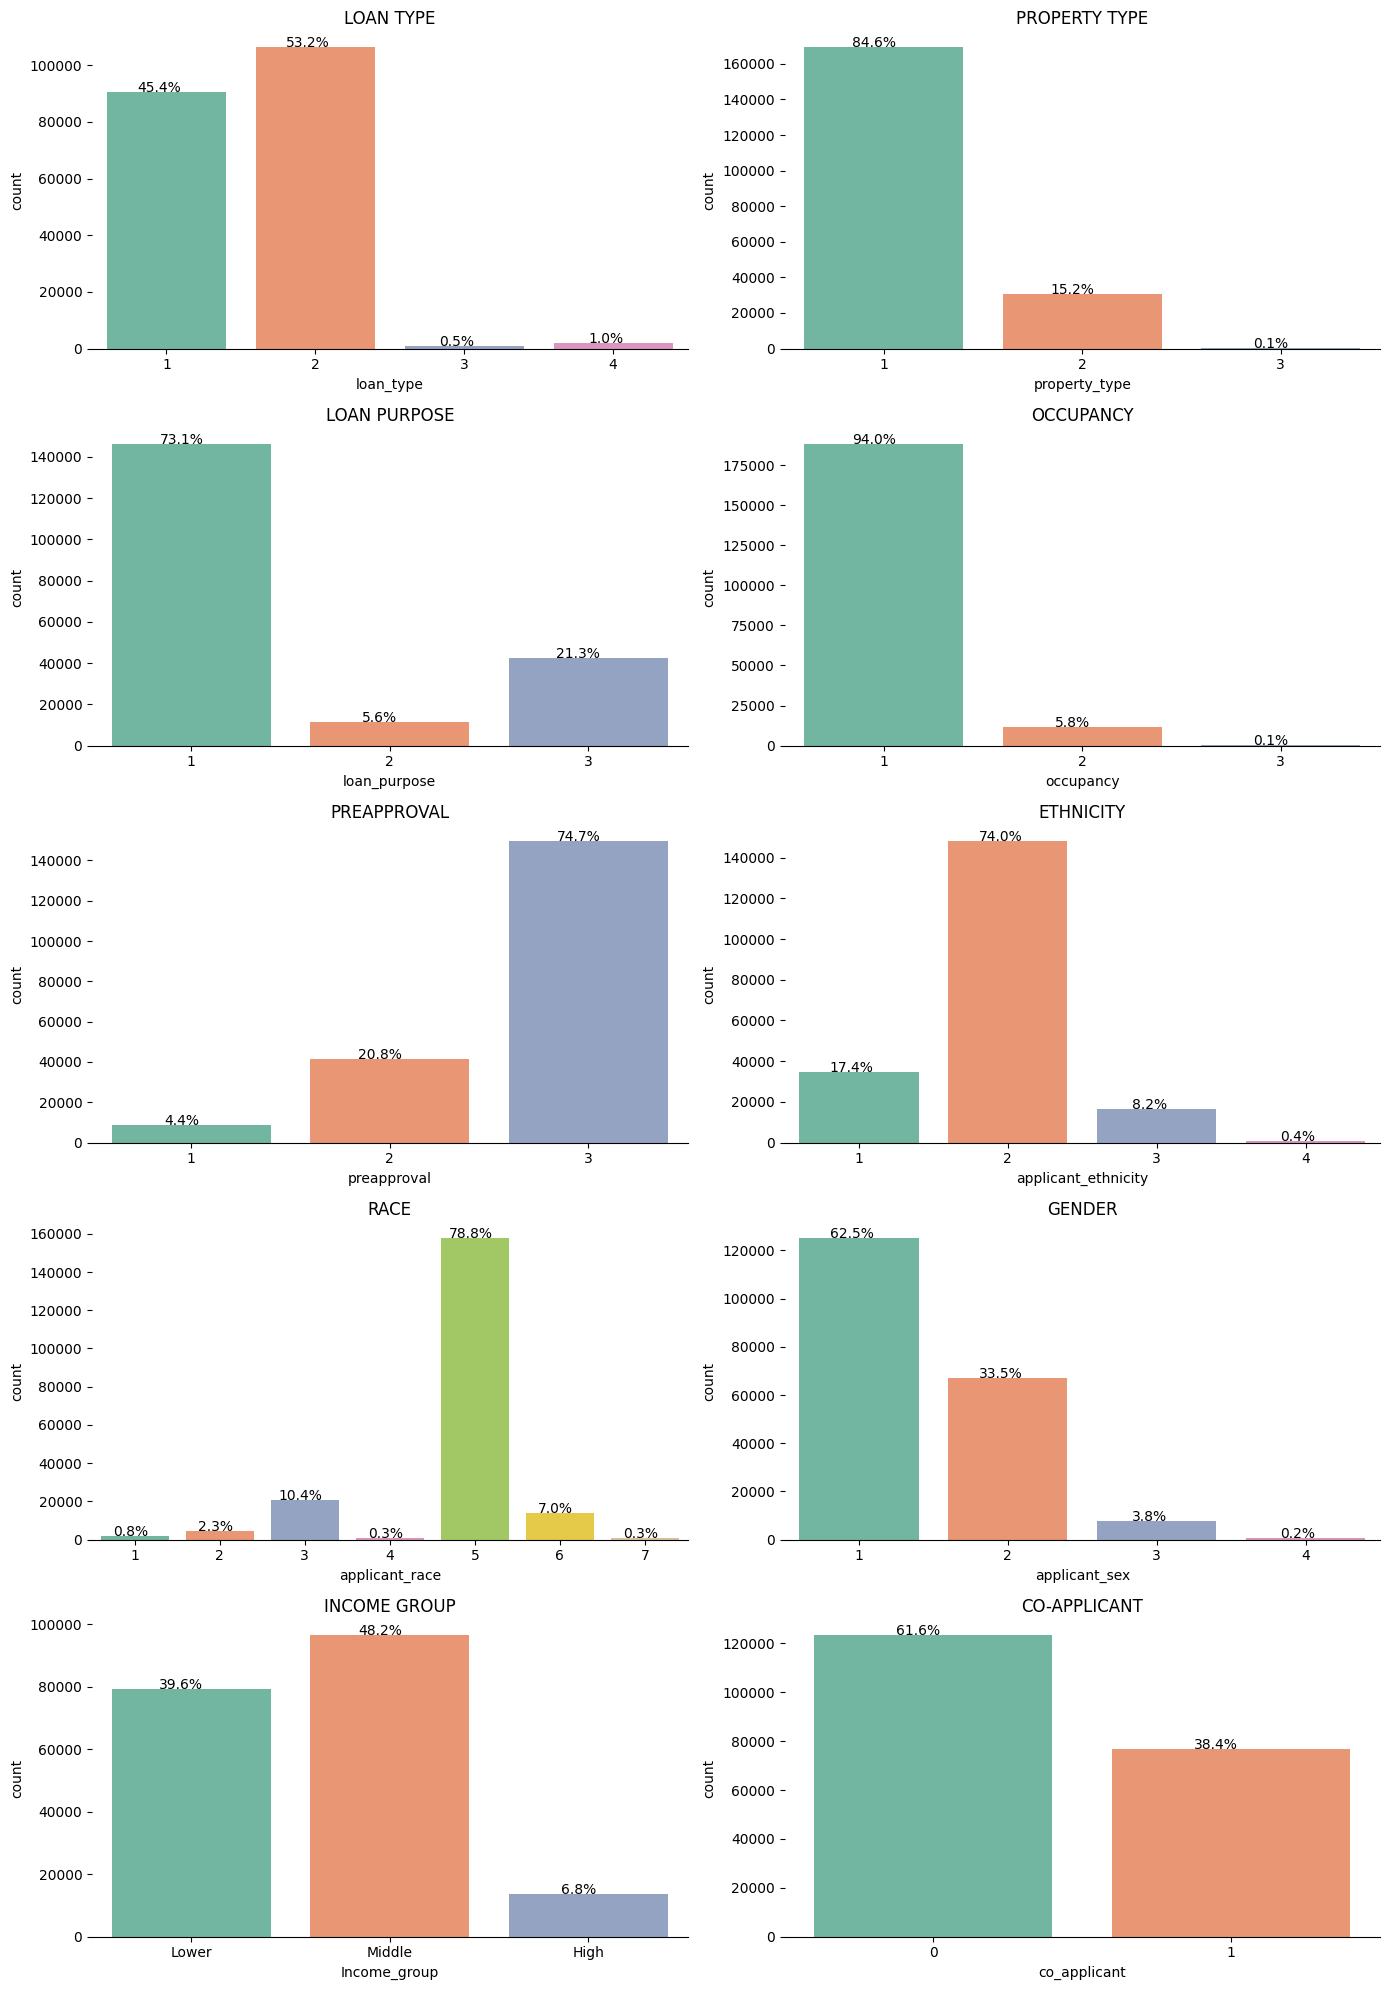

In [16]:
cat_cols =  ['loan_type',
              'property_type',
              'loan_purpose',
              'occupancy',
              'preapproval',
              'applicant_ethnicity',
              'applicant_race',
              'applicant_sex',
              'Income_group',
              'co_applicant'
             ]

title = ['Loan type',
         'Property type',
         'Loan purpose',
         'Occupancy',
         'Preapproval',
         'Ethnicity',
         'Race',
         'Gender',
         'Income group',
         'Co-applicant'
        ]

plt.figure(figsize=(14,20))

for i, column in enumerate(cat_cols):
    plt.subplot(5,2,i+1)
    order = data[column].value_counts(ascending=False).index   
    #sns.set_palette(list_palette[i]) # to set the palette
    sns.set_palette('Set2')
    ax=sns.countplot(x=data[column], data=data )
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[column]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.tight_layout()
    plt.title(title[i].upper())

A few notes:
1. ~99% of loans are either conventional or FHA-insured (quite well balanced).
2. ~73% of loans are given for home purchasing. Only ~5% for home improvement.
3. ~74% of loans not applicable for preapproval. Rest (required preapproval or not) are only given for home purchase.
4. ~85% of properties are 1-4 family houses. Multifamily dwellings are almost none. Also 94% of houses are for the owners to live in.
5. ~48% belong in the medium income category and ~40% are in the lower one.  
6. ~74% of applicants are white and ~79% are not hispanic/latino.
7. ~62% of applicants are men (34% are women).

### Exploring relations between rate_spread and the other features

<AxesSubplot: xlabel='loan_income_ratio', ylabel='rate_spread'>

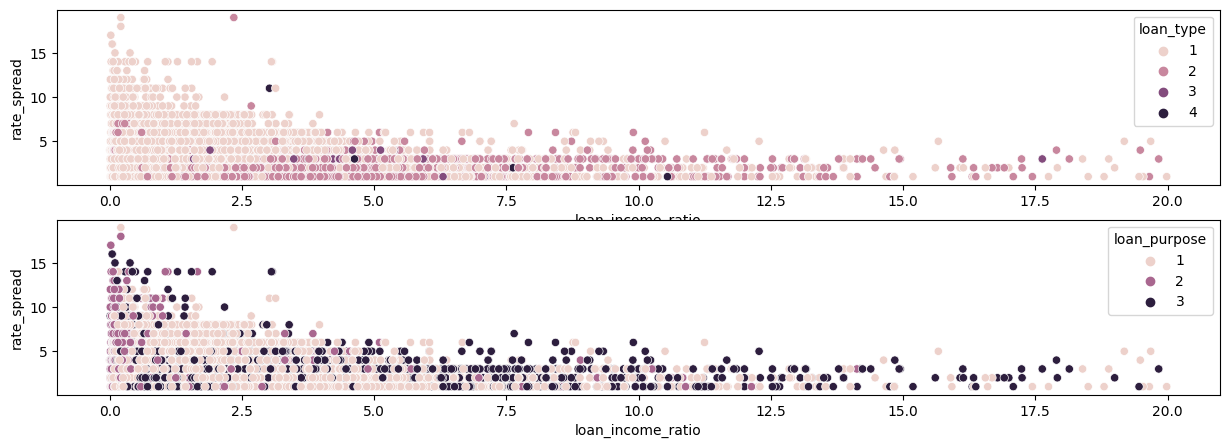

In [17]:
gt3 = (data.loan_income_ratio < 20) & (data.rate_spread < 20)
fig, ax = plt.subplots(2,1, figsize=(15, 5))
sns.scatterplot(data = data[gt3], x = 'loan_income_ratio', y = 'rate_spread', hue = 'loan_type', ax=ax[0])
sns.scatterplot(data = data[gt3], x = 'loan_income_ratio', y = 'rate_spread', hue = 'loan_purpose', ax=ax[1])

It is interesting that very high values of rate_spread occur mostly for small loans compared to the applicant's income.

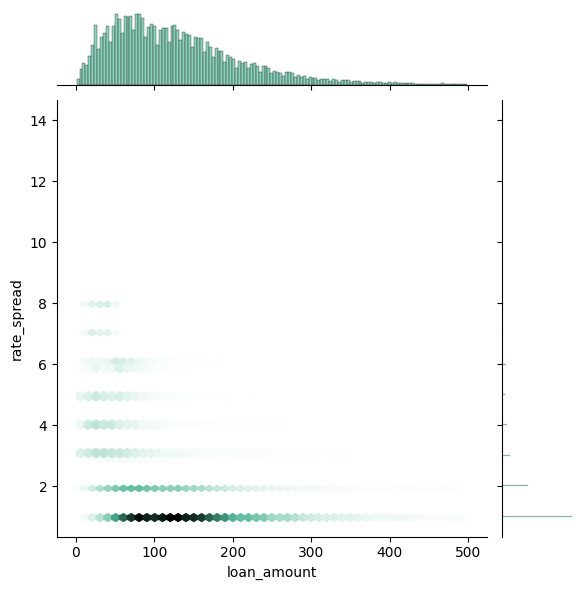

In [18]:
sns.jointplot(data = data[(data.loan_amount < 500) & (data.rate_spread < 15)], x = 'loan_amount', y = 'rate_spread', kind='hex')

<AxesSubplot: xlabel='applicant_income', ylabel='rate_spread'>

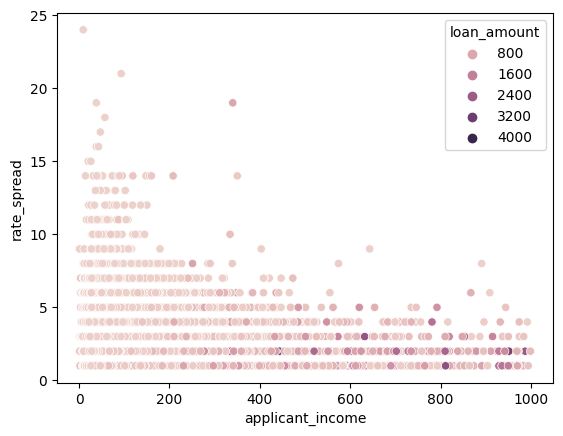

In [19]:
gt = (data.applicant_income<1000) & (data.rate_spread < 30)
sns.scatterplot(data = data[gt], x = 'applicant_income', y = 'rate_spread', hue = 'loan_amount')

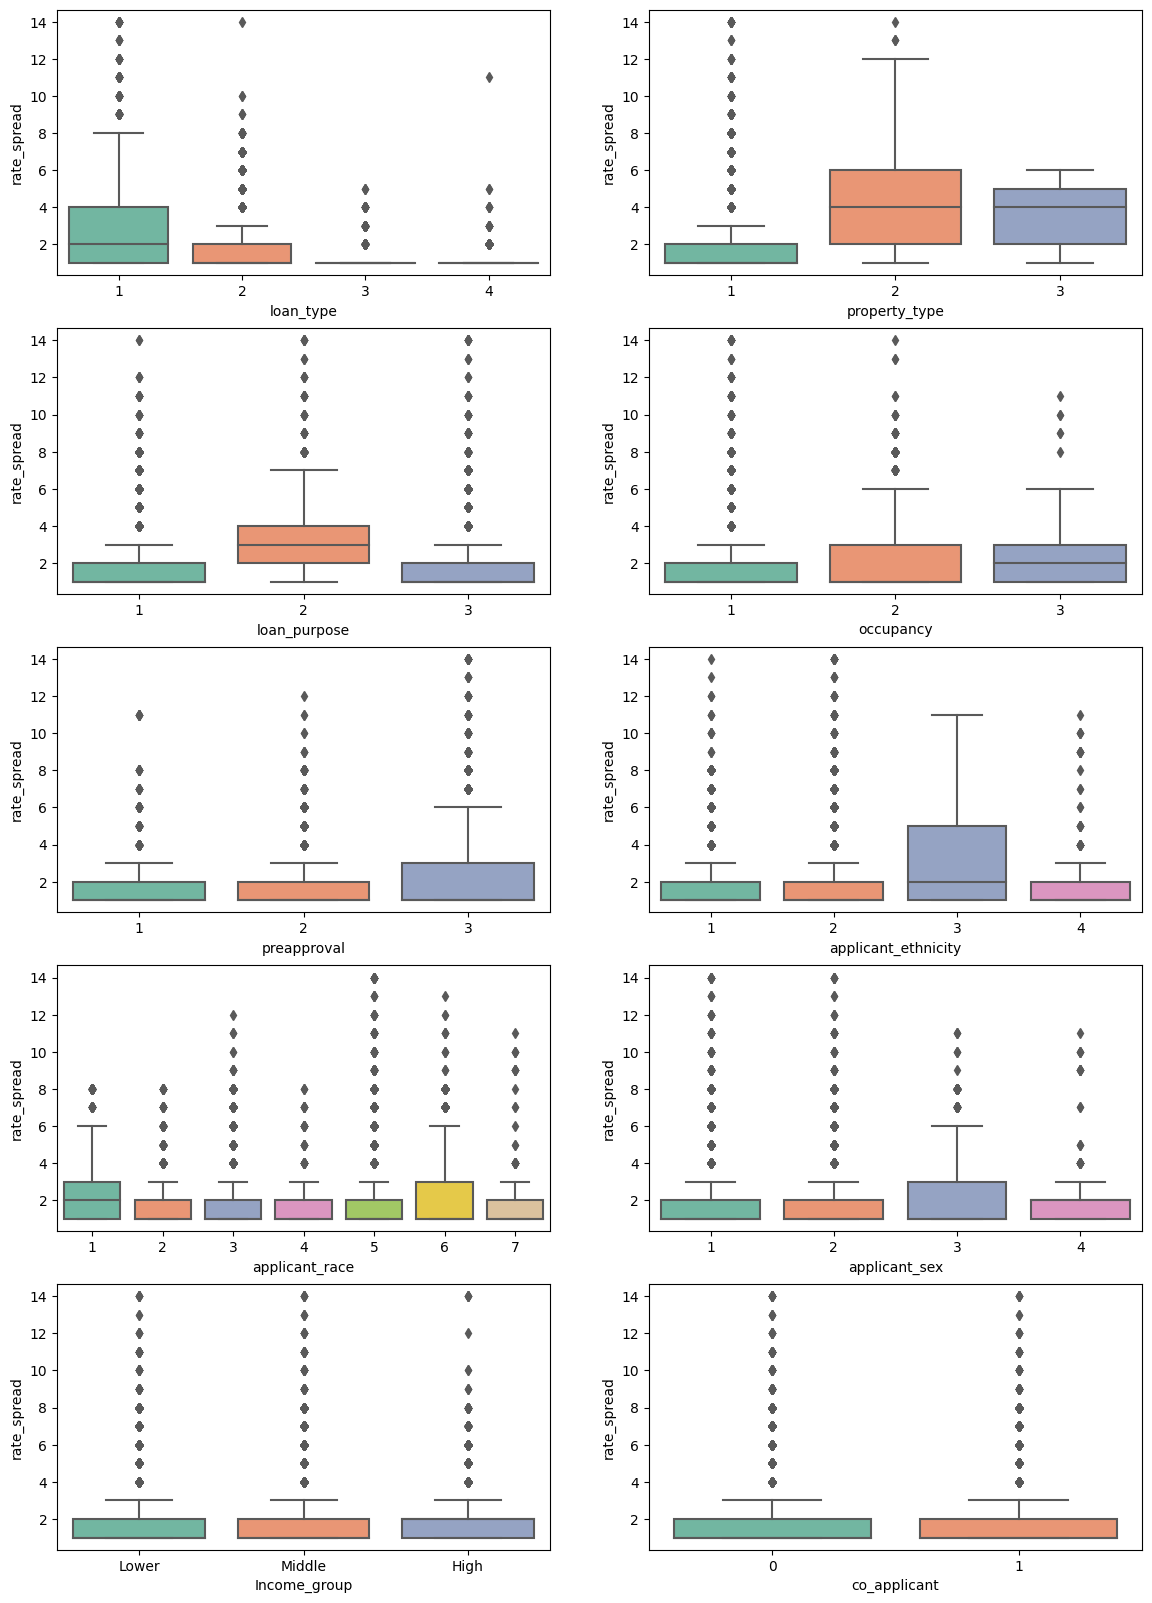

In [20]:
cat_cols =  ['loan_type',
              'property_type',
              'loan_purpose',
              'occupancy',
              'preapproval',
              'applicant_ethnicity',
              'applicant_race',
              'applicant_sex',
              'Income_group',
              'co_applicant'
             ]
plt.figure(figsize=(14,20))
for i, col in enumerate(cat_cols):
    plt.subplot(5,2,i+1)
    sns.boxplot(data = data[data.rate_spread < 15], x=col, y="rate_spread")
    #sns.despine(top=True,right=True,left=True)
plt.show()

A few notes:
1. Larger variance and values for conventional loans.
2. Smaller rate spread for 1-4 families dwellings.
3. Larger variance and rate spread for home improvement loans.
4. The rate spread tends to be larger if the loan is not for primary house.
5. Rate spread slightly larger when no pre-approval is required. 
6. Larger range and values of rate_spread when ethnicity not taken (smaller dataset though).
7. Good overall balance between women and men.
8. Good balance between income groups.
9. Good balance between loans with and without co-applicant.

In [21]:
data[data['rate_spread'] > 40]

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,rate_spread,Income_provided,Income_group,loan_income_ratio
8236,1,1,1,1,5.0,3,179,23,256,1,5,1,46.0,3821.0,66.567,109086.0,79.697,841.0,1103.0,2261,0,99.0,1,Lower,0.108696
161192,1,1,1,1,5.0,3,179,23,285,1,5,1,41.0,7184.0,75.258,108831.0,50.727,938.0,1331.0,2261,0,99.0,1,Lower,0.121951
175355,1,1,1,1,5.0,3,81,9,101,1,5,1,50.0,4839.0,28.831,88539.0,100.000,1317.0,1527.0,2261,0,99.0,1,Lower,0.100000


There are 3 extreme values of rate_spread = 99. I assume that either some error occured while writing on the dataset or it indicates rejection of the loan and this is adefault value. In either way it is interesting that all 3 loans come from the same lender. In that case I would probably reach back to them and ask for clarification. 

### Exploring race/gender/ethnicity

In [22]:
data.groupby('preapproval').loan_purpose.value_counts().unstack(1)

loan_purpose,1,2,3
preapproval,,,
1,8893.0,NaN,NaN
2,41624.0,NaN,NaN
3,95586.0,11273.0,42624.0


In [23]:
print(data.groupby('applicant_race').preapproval.apply(lambda x: (x==1).mean()))
print(data.groupby('applicant_race').preapproval.apply(lambda x: (x==2).mean()))
print(data.groupby('applicant_race').preapproval.apply(lambda x: (x==3).mean()))

applicant_race
1    0.042654
2    0.045593
3    0.057344
4    0.073099
5    0.042305
6    0.049390
7    0.017134
Name: preapproval, dtype: float64
applicant_race
1    0.155806
2    0.307425
3    0.233520
4    0.195906
5    0.205282
6    0.182071
7    0.090343
Name: preapproval, dtype: float64
applicant_race
1    0.801540
2    0.646982
3    0.709136
4    0.730994
5    0.752412
6    0.768539
7    0.892523
Name: preapproval, dtype: float64


In [24]:
print(data.groupby('applicant_ethnicity').preapproval.apply(lambda x: (x==1).mean()))
print(data.groupby('applicant_ethnicity').preapproval.apply(lambda x: (x==2).mean()))
print(data.groupby('applicant_ethnicity').preapproval.apply(lambda x: (x==3).mean()))

applicant_ethnicity
1    0.045811
2    0.044954
3    0.038113
4    0.023810
Name: preapproval, dtype: float64
applicant_ethnicity
1    0.233363
2    0.209900
3    0.143092
4    0.106443
Name: preapproval, dtype: float64
applicant_ethnicity
1    0.720826
2    0.745146
3    0.818795
4    0.869748
Name: preapproval, dtype: float64


In [25]:
data.groupby(['applicant_race']).preapproval.value_counts().unstack()

preapproval,1,2,3
applicant_race,,,
1,72,263,1353
2,210,1416,2980
3,1190,4846,14716
4,50,134,500
5,6668,32356,118593
6,692,2551,10768
7,11,58,573


In [26]:
data.groupby(['applicant_ethnicity']).preapproval.value_counts().unstack()

preapproval,1,2,3
applicant_ethnicity,,,
1,1595,8125,25097
2,6654,31069,110295
3,627,2354,13470
4,17,76,621


We see that majority of house purchase loans no pre-approval was applicable.

In [27]:
data['Ethnic_main'] = np.where(data['applicant_ethnicity'] == 2, True, False)
data['Race_main'] = np.where(data['applicant_race'] == 5, True, False)

In [28]:
data[data['Ethnic_main'] == True][['loan_amount','applicant_income','loan_income_ratio','rate_spread']].describe()

,loan_amount,applicant_income,loan_income_ratio,rate_spread
count,148018.000000,140458.000000,140458.000000,148018.000000
mean,140.120073,76.009654,2.163865,1.920064
std,141.038534,109.491626,2.552610,1.525616
min,1.000000,1.000000,0.003696,1.000000
25%,65.000000,40.000000,1.184783,1.000000
50%,113.000000,58.000000,2.041667,1.000000
75%,176.000000,85.000000,2.921569,2.000000
max,11104.000000,10042.000000,462.666667,39.000000


In [29]:
data[data['Ethnic_main'] == False][['loan_amount','applicant_income','loan_income_ratio','rate_spread']].describe()

,loan_amount,applicant_income,loan_income_ratio,rate_spread
count,51982.000000,48834.000000,48834.000000,51982.000000
mean,149.565138,66.738666,2.532361,2.147243
std,146.580427,93.592744,2.477445,1.973766
min,1.000000,1.000000,0.009878,1.000000
25%,73.000000,38.000000,1.482902,1.000000
50%,126.000000,53.000000,2.457143,1.000000
75%,186.000000,75.000000,3.423077,2.000000
max,6658.000000,9130.000000,323.000000,99.000000


In general we see an average difference of 10k in loan_amount (lower for ethnicity=2), a higher income of around 10k, which results to a lower loan_to_income ratio for ethnicity=2 rows. Finally minorities tend to have higher rate_spread by 0.25% on average.

In [30]:
data[data['Race_main'] == True][['loan_amount','applicant_income','loan_income_ratio','rate_spread']].describe()

,loan_amount,applicant_income,loan_income_ratio,rate_spread
count,157617.000000,150414.000000,150414.000000,157617.000000
mean,137.799216,73.174026,2.220919,1.958754
std,131.596984,104.313995,2.363111,1.635597
min,1.000000,1.000000,0.009357,1.000000
25%,65.000000,39.000000,1.217391,1.000000
50%,114.000000,56.000000,2.090909,1.000000
75%,175.000000,82.000000,3.016667,2.000000
max,11104.000000,10042.000000,462.666667,99.000000


In [31]:
data[data['Race_main'] == False][['loan_amount','applicant_income','loan_income_ratio','rate_spread']].describe()

,loan_amount,applicant_income,loan_income_ratio,rate_spread
count,42383.000000,38878.000000,38878.000000,42383.00000
mean,160.335252,75.335202,2.405990,2.05481
std,176.353275,110.869674,3.121580,1.73134
min,1.000000,1.000000,0.003696,1.00000
25%,71.000000,40.000000,1.410148,1.00000
50%,126.000000,57.000000,2.313343,1.00000
75%,195.000000,84.000000,3.204082,2.00000
max,6658.000000,6105.000000,332.000000,21.00000


Smaller effects are seen between white people and other races. This results to an average 0.1 higher rate spread for non-white applicants.

In [32]:
data[data['applicant_sex'] == 1][['loan_amount','applicant_income','loan_income_ratio','rate_spread']].describe()

,loan_amount,applicant_income,loan_income_ratio,rate_spread
count,124999.000000,119534.000000,119534.000000,124999.000000
mean,147.730990,79.167777,2.201821,1.964712
std,147.695542,118.272568,2.530162,1.651091
min,1.000000,1.000000,0.009357,1.000000
25%,68.000000,42.000000,1.192308,1.000000
50%,120.000000,60.000000,2.067492,1.000000
75%,186.000000,88.000000,3.000000,2.000000
max,11104.000000,9695.000000,332.000000,99.000000


In [33]:
data[data['applicant_sex'] == 2][['loan_amount','applicant_income','loan_income_ratio','rate_spread']].describe()

,loan_amount,applicant_income,loan_income_ratio,rate_spread
count,66975.000000,63292.000000,63292.000000,66975.000000
mean,130.069966,62.034396,2.384243,1.976469
std,108.691348,74.742560,2.629158,1.646432
min,1.000000,1.000000,0.003696,1.000000
25%,64.000000,35.000000,1.394737,1.000000
50%,109.000000,50.000000,2.292135,1.000000
75%,166.000000,72.000000,3.181818,2.000000
max,4158.000000,10042.000000,462.666667,32.000000


Rate spread seems quite balanced between the two genders, while shows an inequality of around 18k on average.

# Numerical features correlations

In [34]:
print(data[gt3].loan_purpose.value_counts())
print(data[data.loan_income_ratio < 20].loan_purpose.value_counts())

1    144609
3     33513
2     11084
Name: loan_purpose, dtype: int64
1    144613
3     33515
2     11084
Name: loan_purpose, dtype: int64


In [36]:
numerical_cols = ['loan_amount',
                  'applicant_income',
                  'population',
                  'minority_population_pct',
                  'ffiecmedian_family_income',
                  'tract_to_msa_md_income_pct',
                  'number_of_owner-occupied_units',
                  'number_of_1_to_4_family_units',
                  'rate_spread',
                  'loan_income_ratio']



numerical_data = data[numerical_cols]
corr = numerical_data.corr()

<AxesSubplot: >

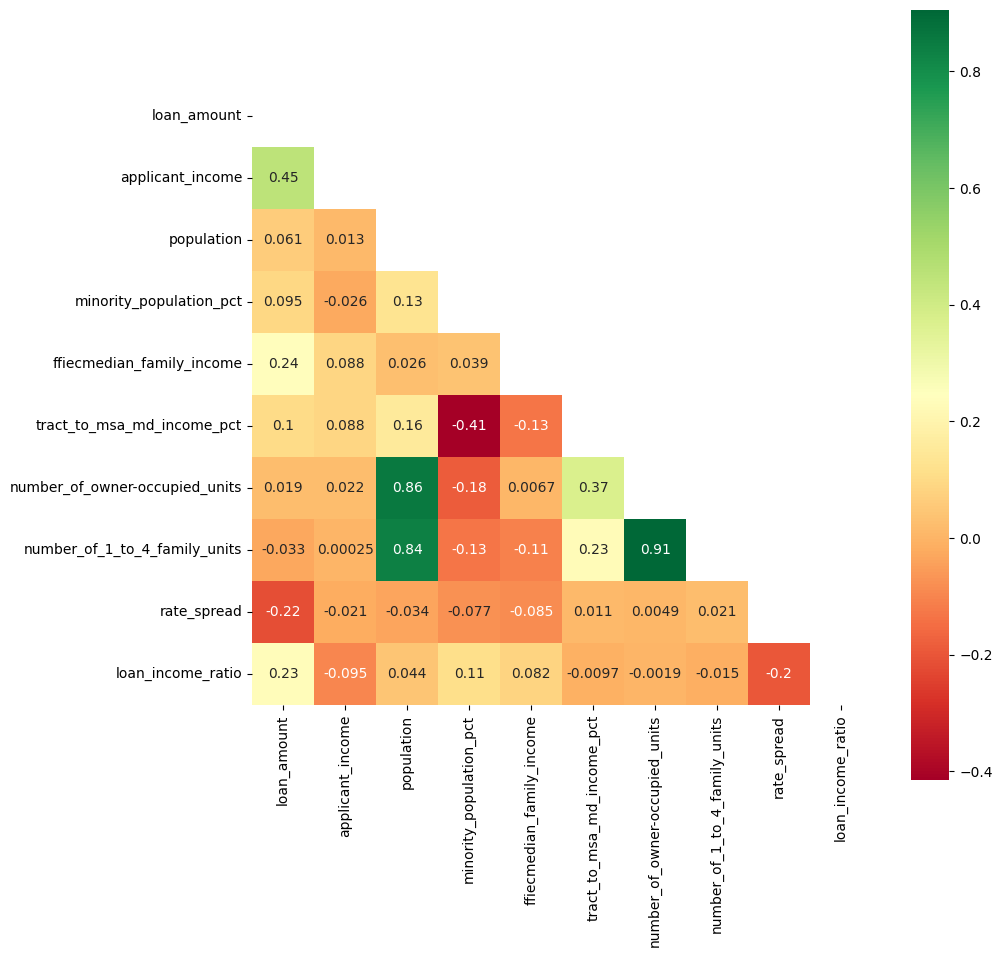

In [37]:
# Getting the Upper Triangle of the co-relation matrix
mask = np.triu(corr)

# using the upper triangle matrix as mask
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr,
            annot=True,
            mask=mask,
            square = True,
            cmap = "RdYlGn",
            ax = ax
           )

<AxesSubplot: >

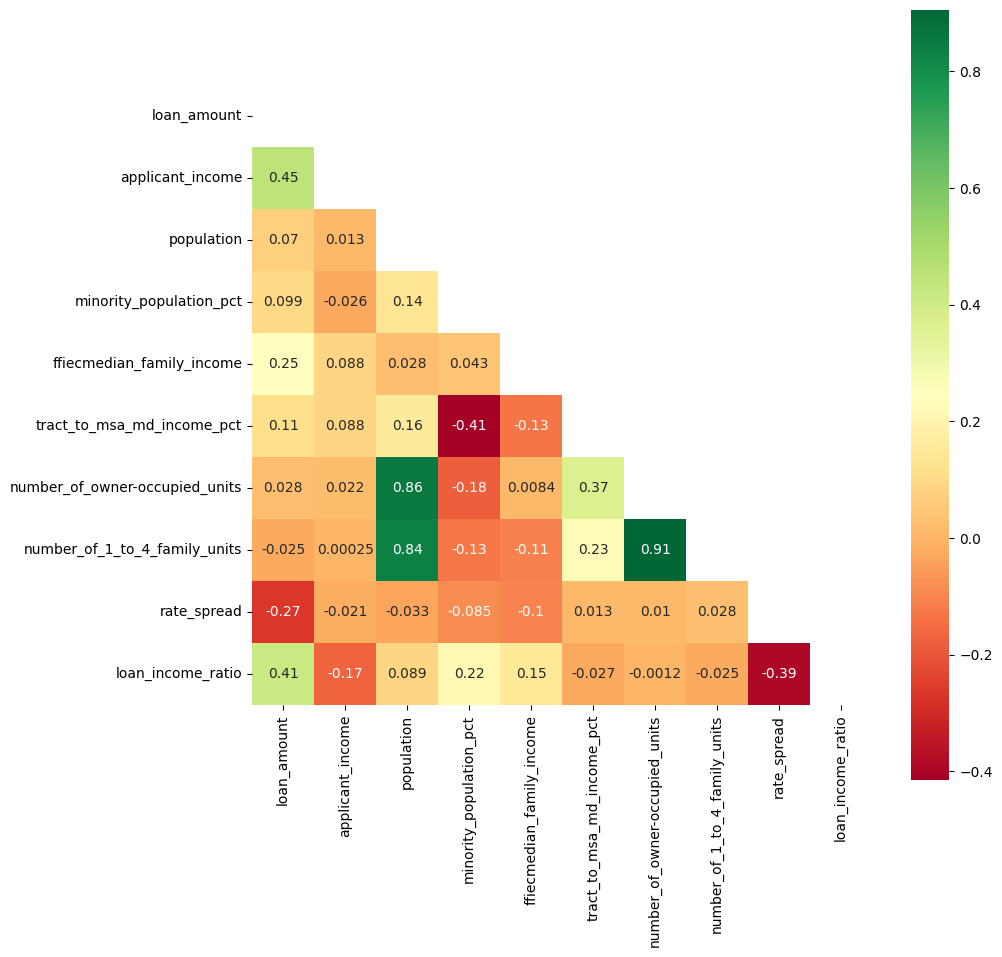

In [39]:
gt = (data.rate_spread < 12) & (data.loan_income_ratio < 20)
numerical_data = data[numerical_cols][gt]
corr = numerical_data.corr()

# Getting the Upper Triangle of the co-relation matrix
mask = np.triu(corr)

# using the upper triangle matrix as mask
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr,
            annot=True,
            mask=mask,
            square = True,
            cmap = "RdYlGn",
            ax = ax
           )

From the correlation matrix above we can see that number_of_owner-occupied_units, number_of_1_to_4_family_units and population are heavily correlated with each other so we can remove two of these for the predictive model. Also moderate correlation exists between loan_amount and applicant_income, between number_of_owner-occupied_units and tract_to_msa_md_md_income_pct (positive correlation) and between tract_to_msa_md_income_pct and minority_population_pct (negative correlation).

# Outlier detection

In [67]:
# #data['applicant_income'].describe()['25%']

# for col in numerical_cols+['loan_income_ratio']:
#     iqr = (data[col].describe()['75%'] - data[col].describe()['25%'])
#     upper = data[col].describe()['75%'] + (iqr*1.5)
#     lower = data[col].describe()['25%'] - (iqr*1.5)
# #print(iqr, upper, lower)
#     outliers_u = data[data[col] > upper]
#     outliers_l = data[data[col] < lower]
#     print('{}\n'.format(col))
#     print('Lower outliers: {}'.format(len(outliers_l)))
#     print('Upper outliers: {}\n'.format(len(outliers_u)))
#     print('#'*40)
    

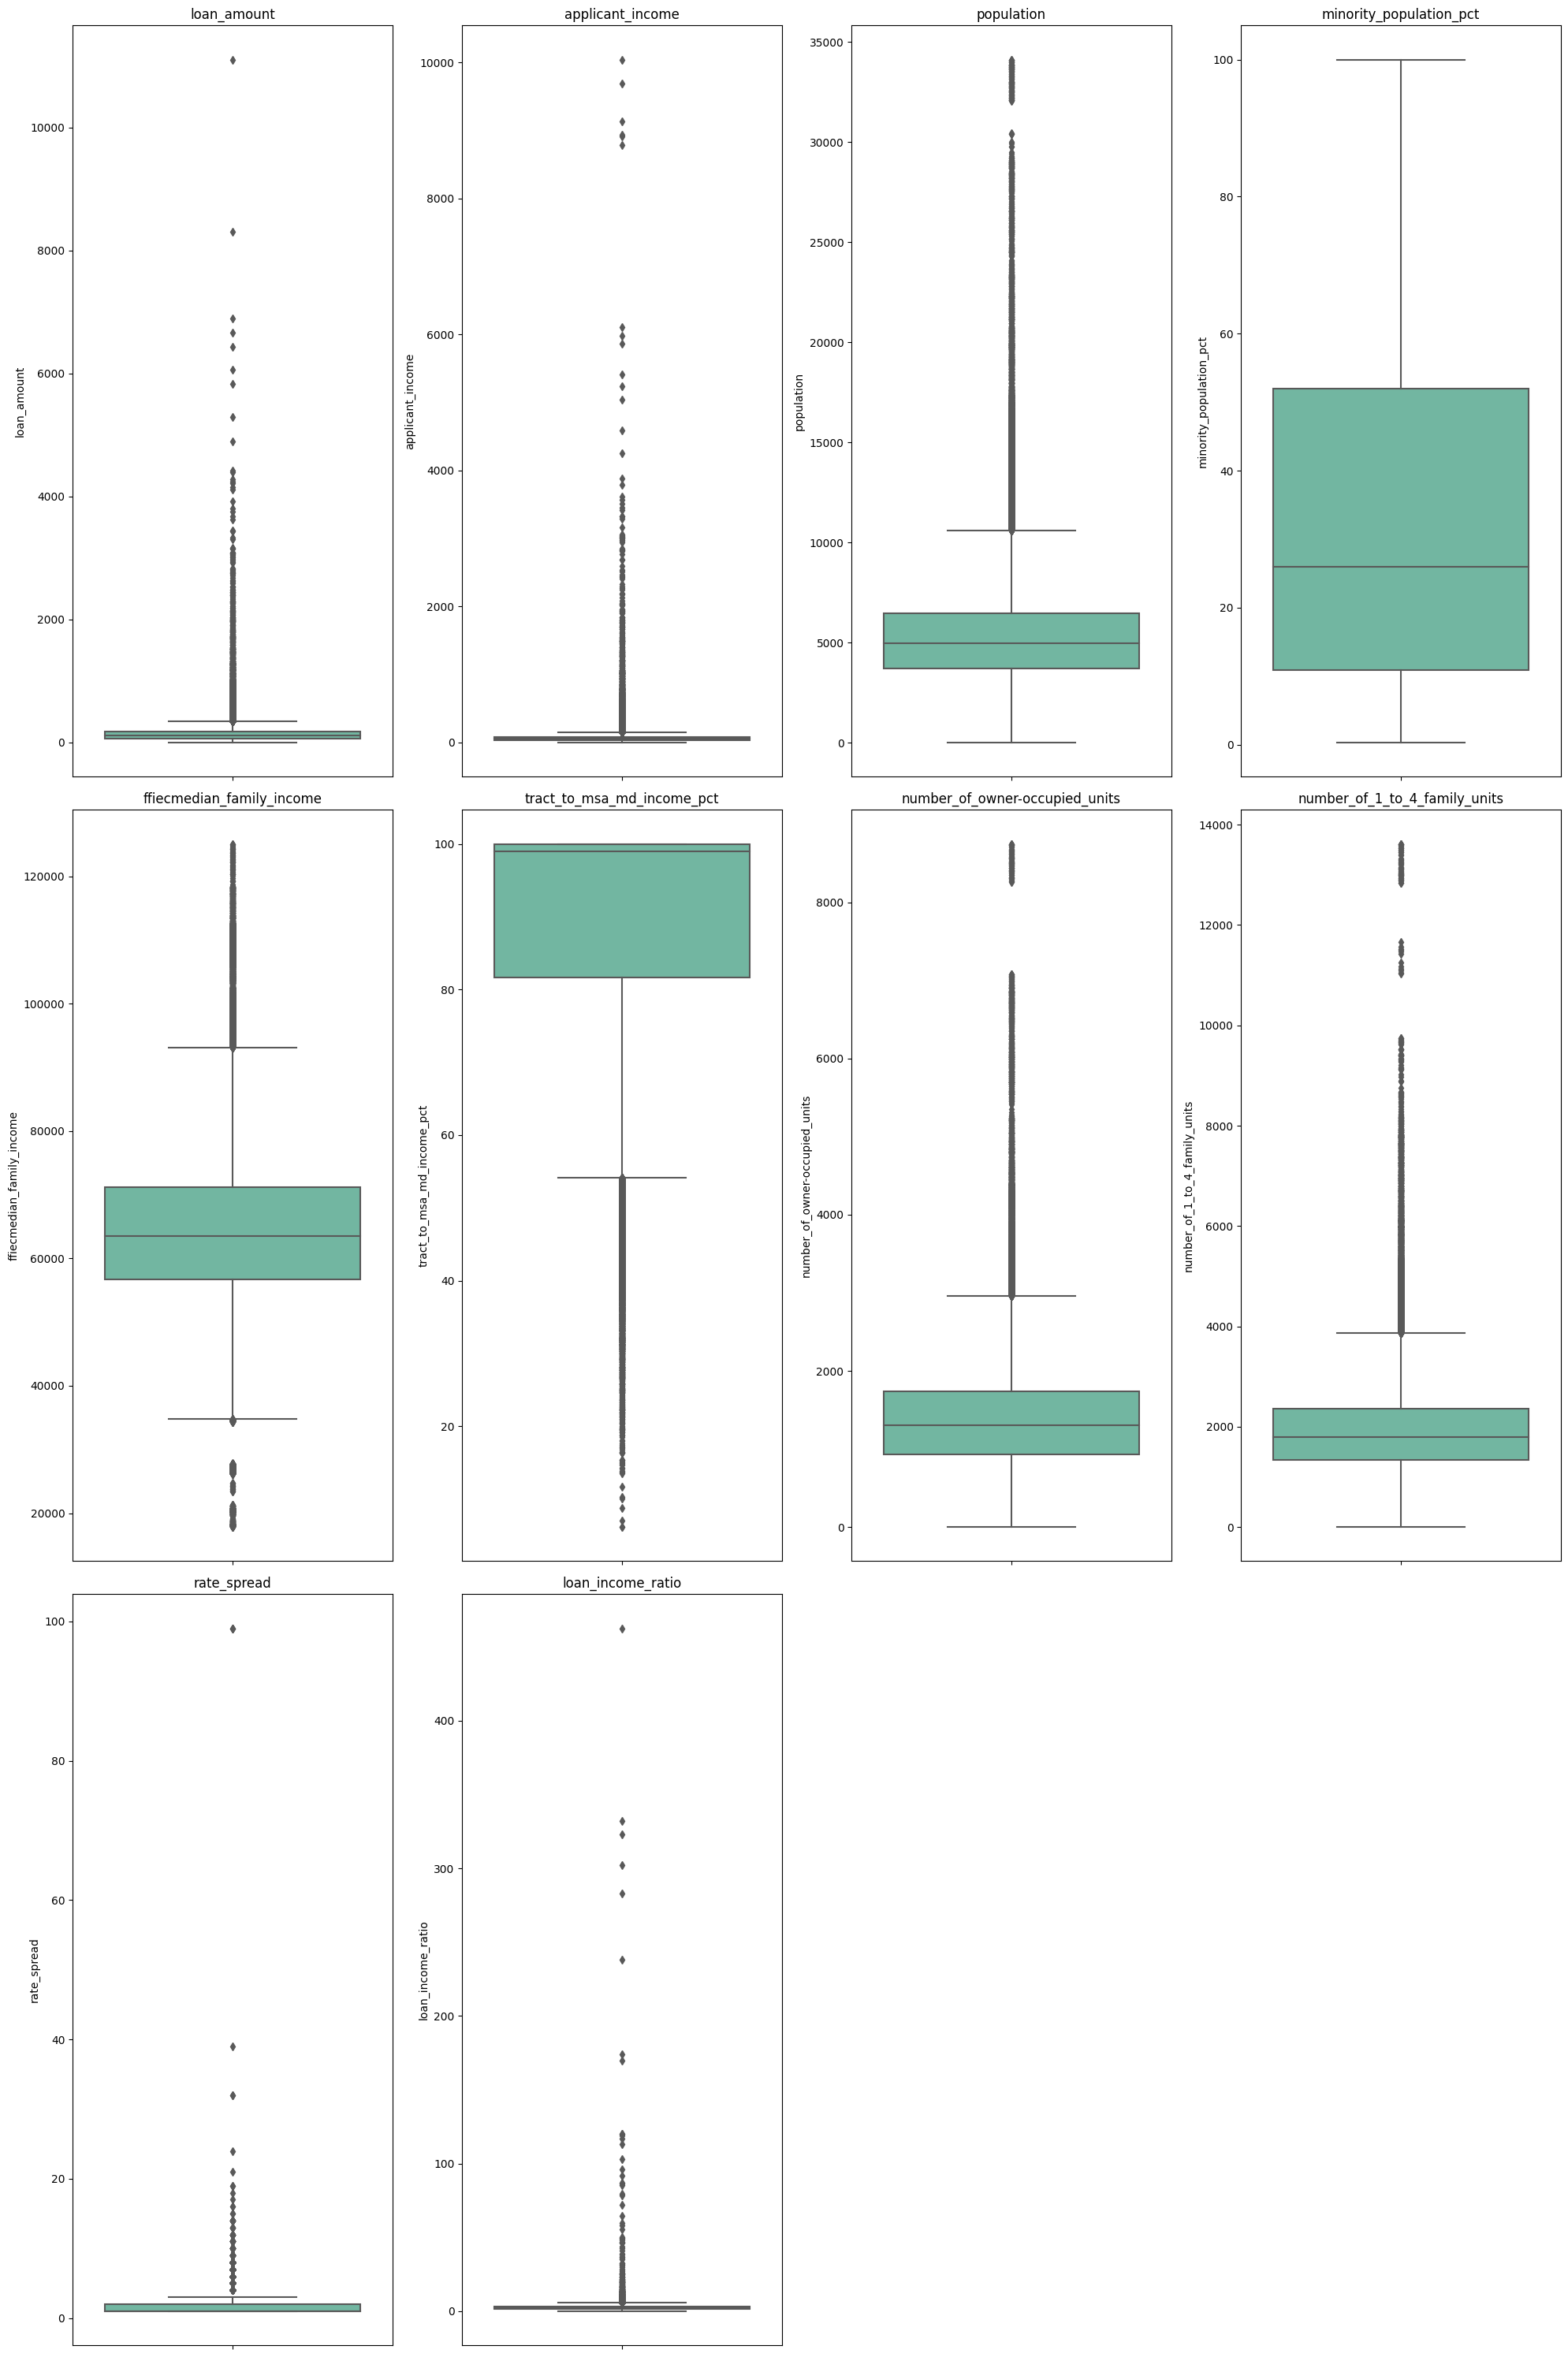

In [41]:
plt.figure(figsize=(20,30))

for i, column in enumerate(numerical_cols):
    plt.subplot(3,4,i+1)
    sns.boxplot(data = data, y = column)
    plt.tight_layout()
    plt.title(column)

plt.show()

In general we can see that all features above have a good number of outliers. Removing all of them however is not feasible. We can however trim a bit the extreme values for some.

# NaN entries

Replace the NaN values in the applicant_income column with the median tract income calculated from ffiecmedian_family_income and data.tract_to_msa_md_income_pct features

In [42]:
data_2 = data.copy()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   loan_type                       200000 non-null  int64   
 1   property_type                   200000 non-null  int64   
 2   loan_purpose                    200000 non-null  int64   
 3   occupancy                       200000 non-null  int64   
 4   loan_amount                     200000 non-null  float64 
 5   preapproval                     200000 non-null  int64   
 6   msa_md                          200000 non-null  int64   
 7   state_code                      200000 non-null  int64   
 8   county_code                     200000 non-null  int64   
 9   applicant_ethnicity             200000 non-null  int64   
 10  applicant_race                  200000 non-null  int64   
 11  applicant_sex                   200000 non-null  int64   
 12  ap

In [43]:
census_null_cols = ['population',
                    'minority_population_pct',
                    'ffiecmedian_family_income',
                    'tract_to_msa_md_income_pct',
                    'number_of_owner-occupied_units',
                    'number_of_1_to_4_family_units'
                   ]

census_null_df = pd.DataFrame()
for col in census_null_cols:
    mean_by_msa_md = data.groupby(['msa_md'])[col].mean()
    census_null_df[col+'_mean'] = mean_by_msa_md


data_temp = data.merge(census_null_df, how='left', on='msa_md')


for col in census_null_cols:    
    data_temp[col].fillna(data_temp[col+'_mean'], inplace = True)


data_temp.applicant_income.fillna(data_temp.ffiecmedian_family_income*data_temp.tract_to_msa_md_income_pct / 100000, inplace = True)
data_temp.loan_income_ratio.fillna(data_temp.loan_amount / data_temp.applicant_income, inplace = True)
data_temp["Income_group"] = pd.cut(x=data_temp["applicant_income"],
                              bins=[0, 50, 140, 100000],
                              labels=["Lower", "Middle", "High"]
                             )

In [44]:
final_data = data_temp.loc[:,~data_temp.columns.str.contains('_mean', case=False)]

In [45]:
len(data[data.applicant_income < 5])

43

<AxesSubplot: xlabel='applicant_income', ylabel='Count'>

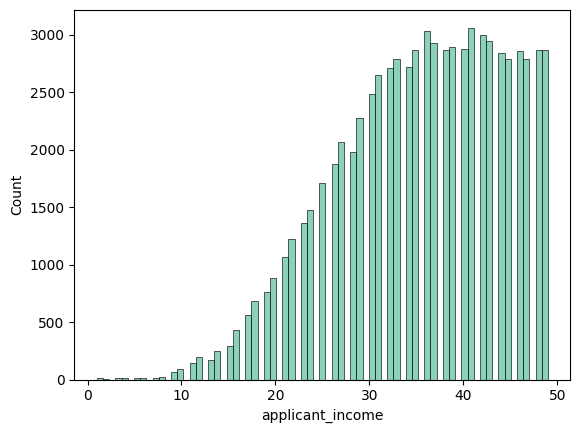

In [46]:
sns.histplot(data[data.applicant_income < 50], x = 'applicant_income')

# Census Features

<AxesSubplot: xlabel='population', ylabel='Count'>

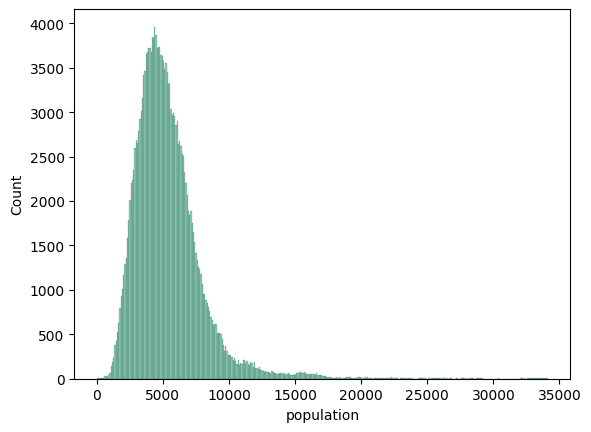

In [47]:
sns.histplot(data = data, x = 'population')

<AxesSubplot: xlabel='minority_population_pct', ylabel='Count'>

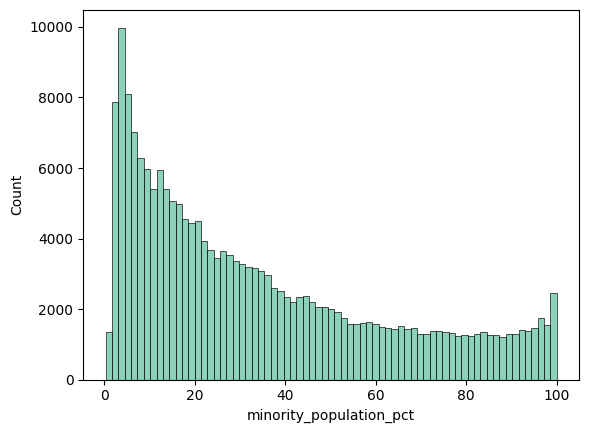

In [48]:
sns.histplot(data = data, x = 'minority_population_pct')

<AxesSubplot: xlabel='ffiecmedian_family_income', ylabel='Count'>

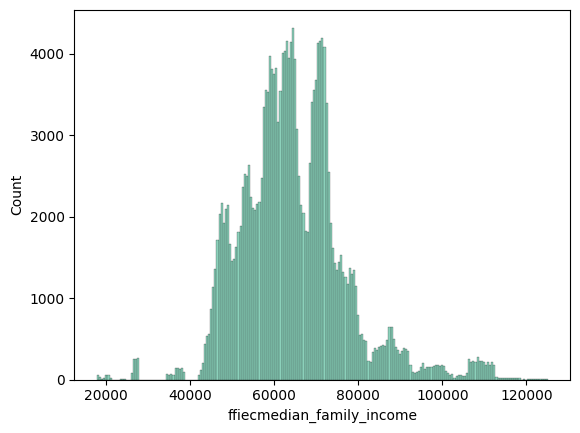

In [49]:
sns.histplot(data=data, x = 'ffiecmedian_family_income')

<AxesSubplot: xlabel='tract_to_msa_md_income_pct', ylabel='Count'>

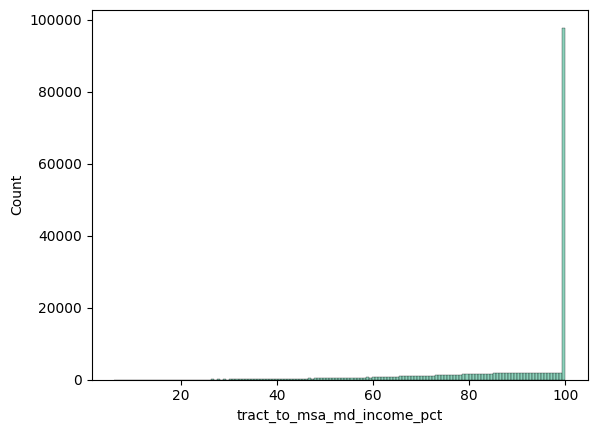

In [50]:
sns.histplot(data=data, x = 'tract_to_msa_md_income_pct')

<AxesSubplot: xlabel='number_of_owner-occupied_units', ylabel='Count'>

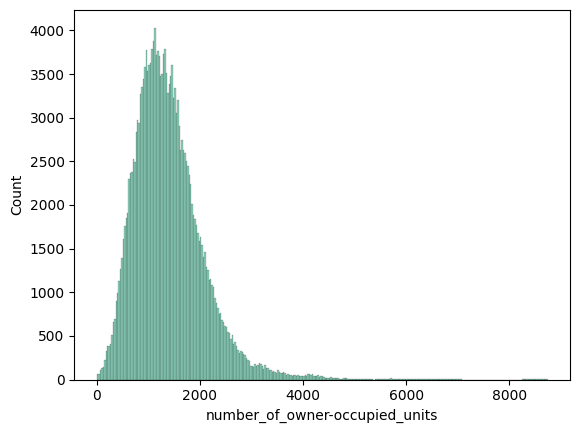

In [51]:
sns.histplot(data=data, x='number_of_owner-occupied_units')

<AxesSubplot: xlabel='number_of_1_to_4_family_units', ylabel='Count'>

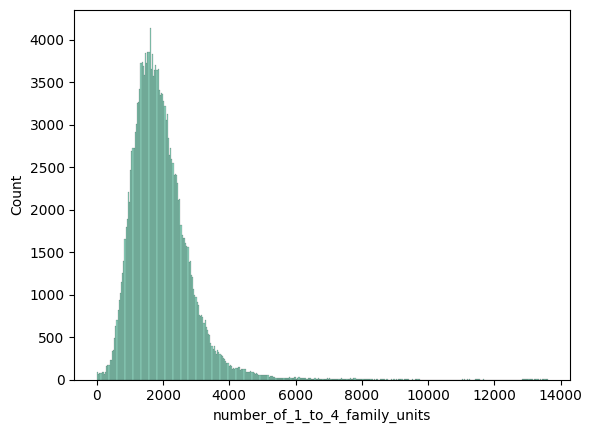

In [52]:
sns.histplot(data=data, x='number_of_1_to_4_family_units')

# Location data

<AxesSubplot: xlabel='msa_md', ylabel='Count'>

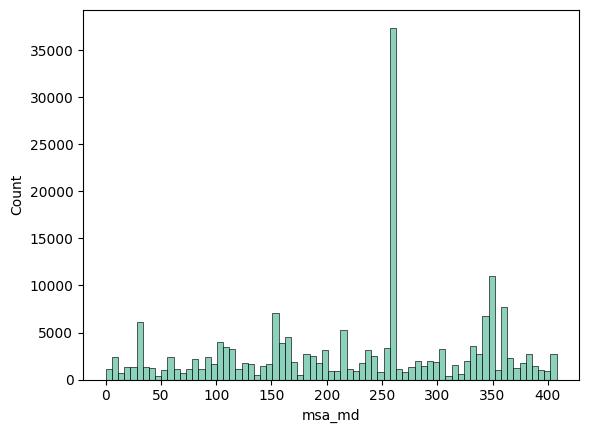

In [53]:
sns.histplot(data=data, x='msa_md')

<AxesSubplot: xlabel='state_code', ylabel='Count'>

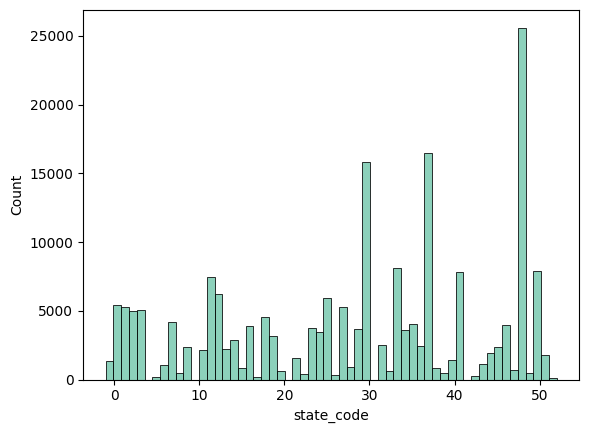

In [54]:
sns.histplot(data=data, x='state_code')

# Predictions

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
full_data = final_data.copy()

In [59]:
to_drop_cols = ['msa_md',
               #'state_code',
               'county_code',
               'applicant_ethnicity',
               'applicant_race',
               'applicant_sex',
               'lender',
               'Income_group',
                'Income_group',
                'Ethnic_main',
                'Race_main'
               ]

categorical_cols =  ['loan_type',
                     'property_type',
                     'loan_purpose',
                     'occupancy',
                     'preapproval',
                     'state_code',
                     'co_applicant',
                     'Income_provided'
                    ]

df = full_data.drop(to_drop_cols, axis=1)

df[categorical_cols] = df[categorical_cols].astype('int64')

In [60]:
gt = (df.loan_type < 3) & (df.property_type < 3) & (df.occupancy < 3) & (df.rate_spread < 15) & (df.loan_income_ratio < 30) & (df.applicant_income < 3000)

df = df[gt]

len(df)

196425

In [61]:
df[categorical_cols] = df[categorical_cols].astype('category')

data_pred = pd.get_dummies(df, columns = categorical_cols, drop_first=False)
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196425 entries, 0 to 199999
Data columns (total 79 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   loan_amount                     196425 non-null  float64
 1   applicant_income                196425 non-null  float64
 2   population                      196425 non-null  float64
 3   minority_population_pct         196425 non-null  float64
 4   ffiecmedian_family_income       196425 non-null  float64
 5   tract_to_msa_md_income_pct      196425 non-null  float64
 6   number_of_owner-occupied_units  196425 non-null  float64
 7   number_of_1_to_4_family_units   196425 non-null  float64
 8   rate_spread                     196425 non-null  float64
 9   loan_income_ratio               196425 non-null  float64
 10  loan_type_1                     196425 non-null  uint8  
 11  loan_type_2                     196425 non-null  uint8  
 12  property_type_1 

In [62]:
X_data = data_pred.drop(['rate_spread'], axis = 1)
y_data = data_pred['rate_spread']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                stratify=y_data, 
                                                test_size=0.2)

In [64]:
numerical_columns = ['loan_amount',
                     'applicant_income',
                     'population',
                     'minority_population_pct',
                     'ffiecmedian_family_income',
                     'tract_to_msa_md_income_pct',
                     'number_of_owner-occupied_units',
                     'number_of_1_to_4_family_units',
                     'loan_income_ratio']

In [165]:
# ls = Lasso()

# estimator_ls = Pipeline([('scaler', StandardScaler()), 
#                       ("model", ls)])

# parameters_ls = {'model__alpha': np.arange(0.00001,1,100)}

# lso = GridSearchCV(estimator = estimator_ls, param_grid=parameters_ls, cv = 10, n_jobs=-1, verbose=0)

# lso = lso.fit(X_train, y_train)
# print(lso.best_params_)

In [88]:
# best_ls = LinearRegression()
# scaler = StandardScaler()

# X_train_lr = X_train.copy()
# X_test_lr = X_test.copy()



# X_train_lr[numerical_columns] = scaler.fit_transform(X_train_lr[numerical_columns])
# X_test_lr[numerical_columns] = scaler.transform(X_test_lr[numerical_columns])

# best_ls.fit(X_train_lr, y_train)
# train_pred_ls = best_ls.predict(X_train_lr)

# test_pred_ls = best_ls.predict(X_test_lr)


In [167]:
# print(mean_absolute_error(train_pred_ls, y_train))
# print(mean_absolute_error(test_pred_ls, y_test))

In [168]:
# train_pred_ls_int = np.rint(train_pred_ls)
# test_pred_ls_int = np.rint(test_pred_ls)

In [169]:
#np.unique(test_pred_ls_int)

In [170]:
# cm = confusion_matrix(y_train, train_pred_ls_int, labels = [i for i in range(1,15)])
# disp = ConfusionMatrixDisplay(cm)

# fig, ax = plt.subplots(figsize=(15,15))

# disp.plot(ax = ax)
# plt.show()

In [171]:
# cm = confusion_matrix(y_test, test_pred_int)
# disp = ConfusionMatrixDisplay(cm)

# fig, ax = plt.subplots(figsize=(15,15))

# disp.plot(ax = ax)
# plt.show()

In [65]:
dt = DecisionTreeRegressor()


parameters_dt = {'max_depth': [2, 3, 5, 10, 20, 50],
                 'min_samples_leaf': [2, 5, 10, 20, 50, 100]
                }

dt_grid = GridSearchCV(estimator = dt, param_grid=parameters_dt, cv = 5, n_jobs=-1, verbose=0)

dt_grid = dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 20}


In [66]:
best_tree = DecisionTreeRegressor(max_depth=10, min_samples_leaf=20)

best_tree.fit(X_train, y_train)
train_pred_tree = best_tree.predict(X_train)

test_pred_tree = best_tree.predict(X_test)



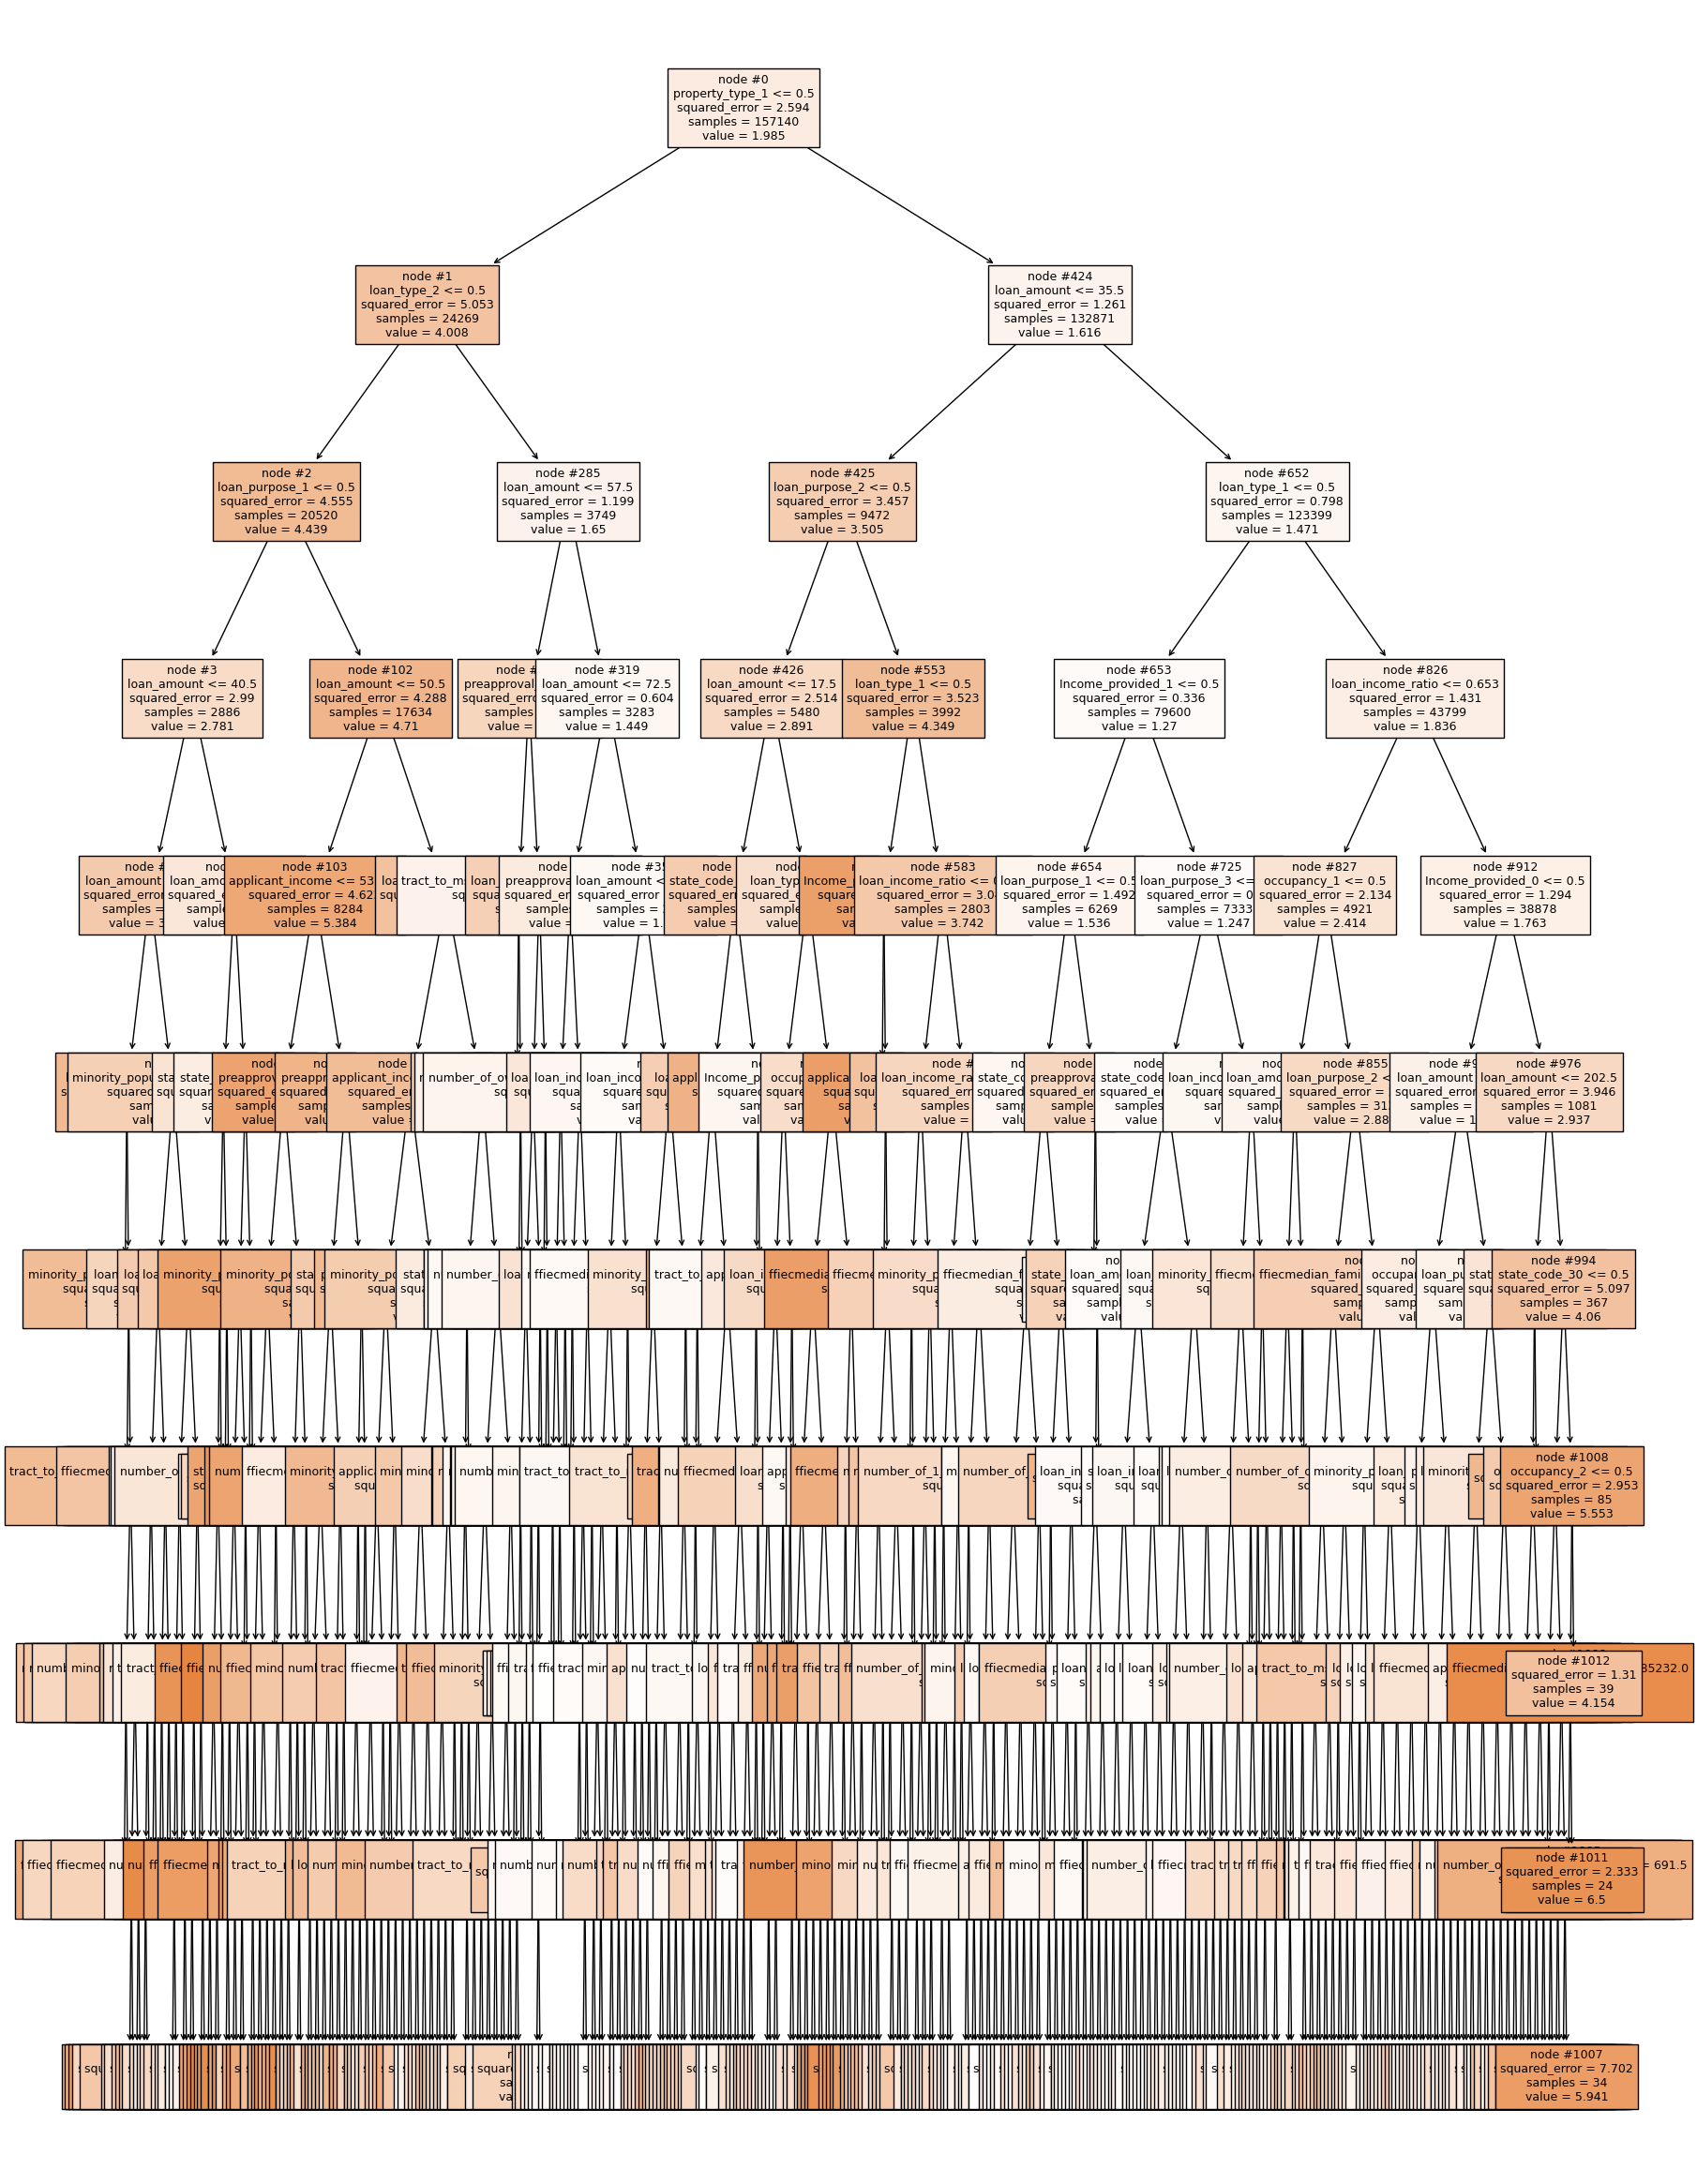

In [67]:
from sklearn import tree

plt.figure(figsize=(20,30))

out = tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True,fontsize=9,node_ids=True,class_names=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [68]:
print(mean_absolute_error(train_pred_tree, y_train))
print(mean_absolute_error(test_pred_tree, y_test))

0.6822015763653315
0.7058718828680164


In [69]:
train_pred_int_tree = np.rint(train_pred_tree)
test_pred_int_tree = np.rint(test_pred_tree)

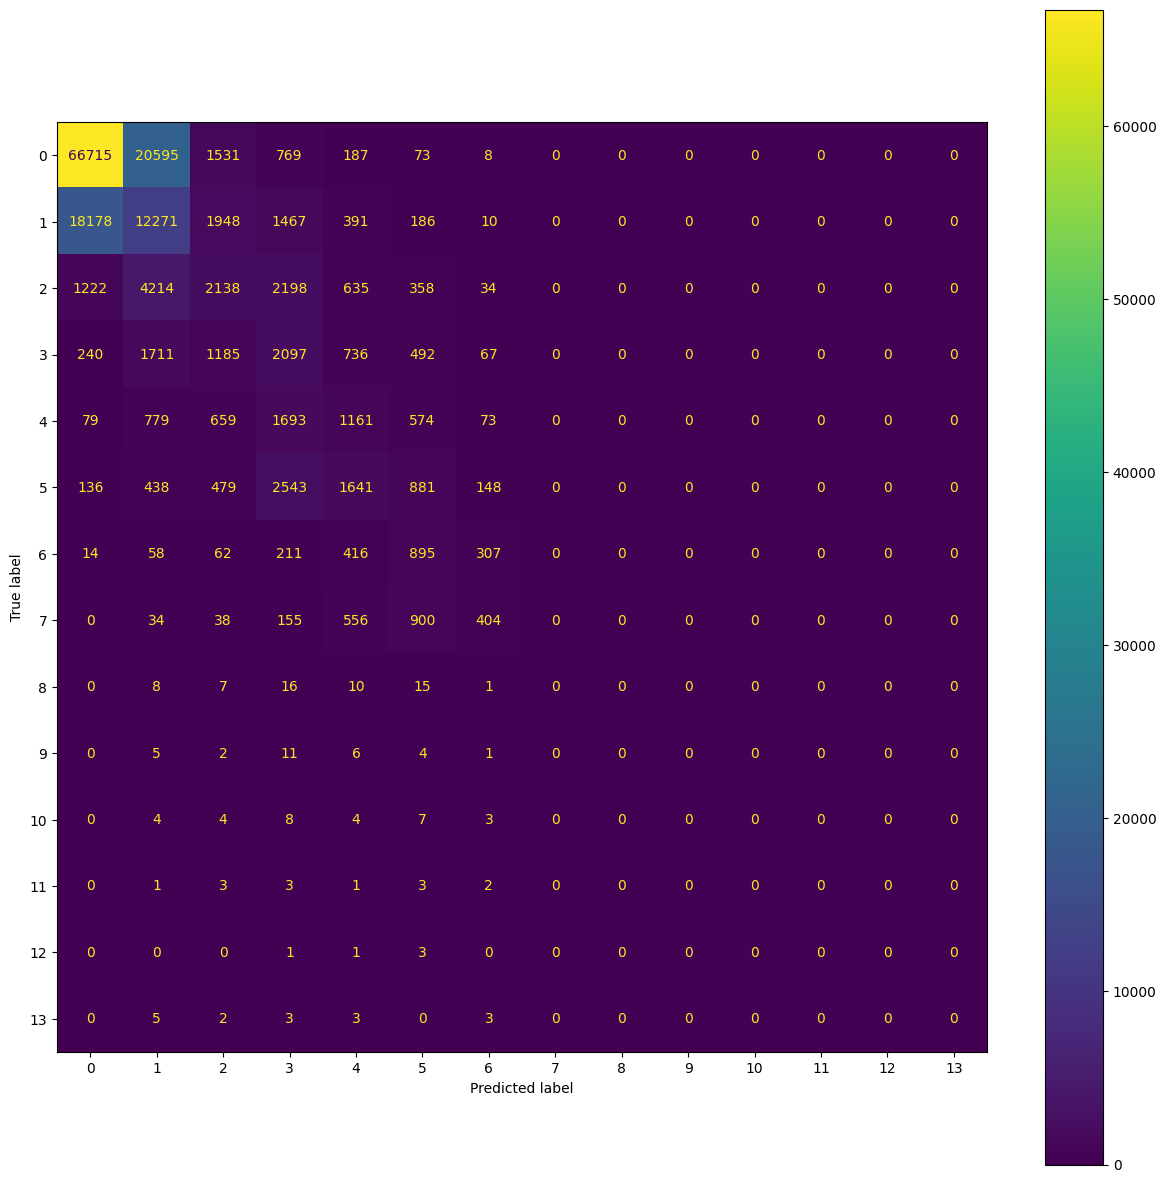

In [70]:
cm_tree_train = confusion_matrix(y_train, train_pred_int_tree)
disp_tree_train = ConfusionMatrixDisplay(cm_tree_train)

fig, ax = plt.subplots(figsize=(15,15))

disp_tree_train.plot(ax = ax)
plt.show()

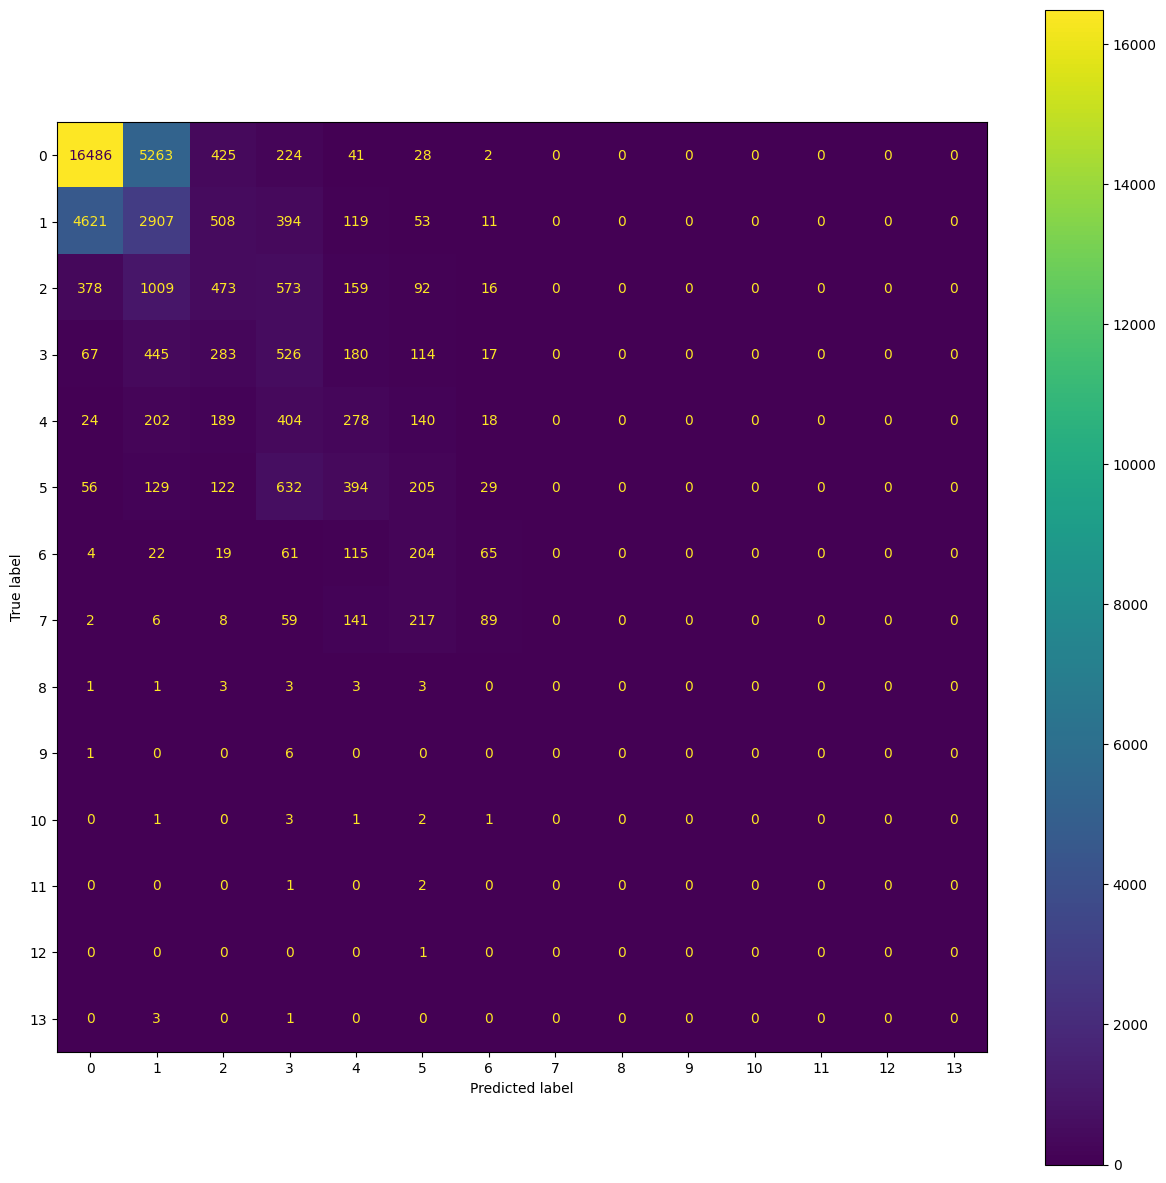

In [71]:
cm_tree_test = confusion_matrix(y_test, test_pred_int_tree)
disp_tree_test = ConfusionMatrixDisplay(cm_tree_test)

fig, ax = plt.subplots(figsize=(15,15))

disp_tree_test.plot(ax = ax)
plt.show()

In [72]:
tree_features = pd.DataFrame({'col_name': best_tree.feature_importances_},
                             index=X_train.columns).sort_values(by='col_name', ascending=False)

tree_features[tree_features.col_name > 0.005]

,col_name
property_type_1,0.469286
loan_amount,0.212023
loan_type_2,0.098507
loan_type_1,0.052412
loan_purpose_1,0.040399
loan_purpose_2,0.022926
loan_income_ratio,0.017096
applicant_income,0.009618
minority_population_pct,0.009609
occupancy_1,0.008406


Text(0.5, 1.0, 'Decision Tree Feature Importance')

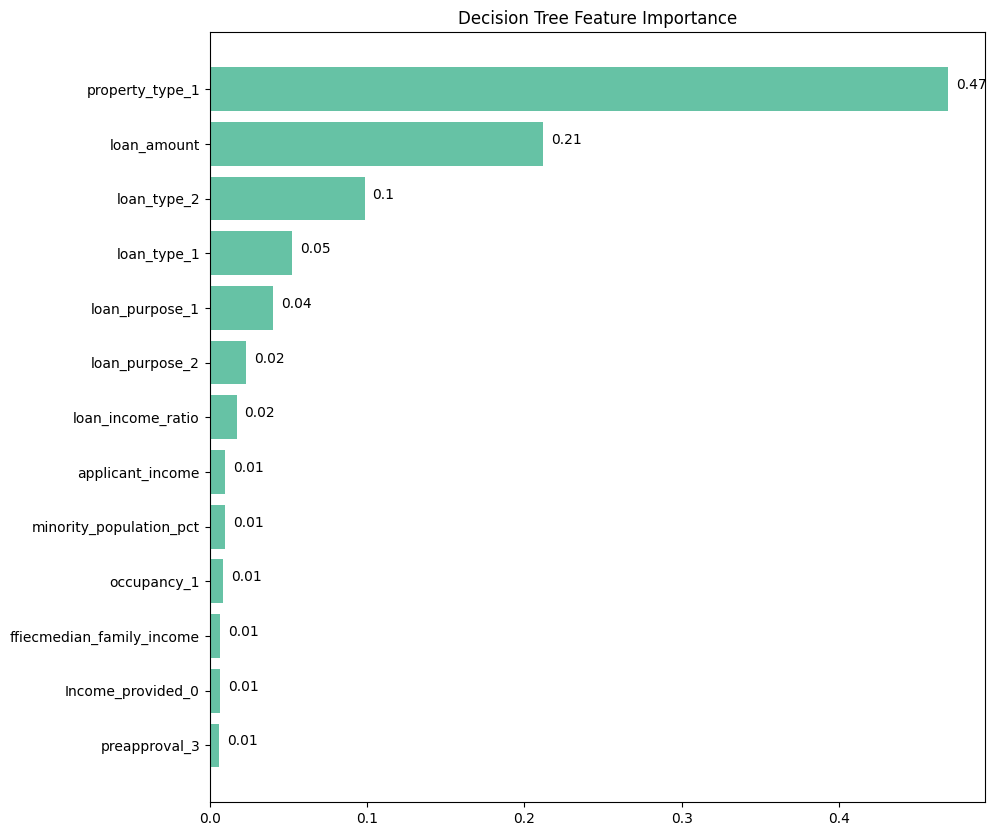

In [73]:
scores = tree_features[tree_features.col_name > 0.005].col_name.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
    
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(width, scores)
    
for index, value in enumerate(scores):
    plt.text(value +0.005 , index, str(round(value,2)))
    
plt.yticks(width, ticks)    
plt.title('Decision Tree Feature Importance')

In [74]:
rf = RandomForestRegressor()


parameters_rf = {"n_estimators": [50, 80, 130], 
               "max_depth": [10, 20, 40],
               "min_samples_leaf": [5, 10, 20]
              }

rf_grid = GridSearchCV(estimator= rf, param_grid = parameters_rf, cv=5, n_jobs=-1, verbose=0)

rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)

KeyboardInterrupt: 

In [123]:
best_rf = RandomForestRegressor(n_estimators = 150, max_depth=45, min_samples_leaf=45)

best_rf.fit(X_train, y_train)
train_pred_rf = best_rf.predict(X_train)

test_pred_rf = best_rf.predict(X_test)



print(mean_absolute_error(train_pred_rf, y_train))
print(mean_absolute_error(test_pred_rf, y_test))



0.650350370466853
0.6878406157270217


In [124]:
train_pred_int_rf = np.rint(train_pred_rf)
test_pred_int_rf = np.rint(test_pred_rf)

In [174]:
#test = pd.DataFrame({'Labels': y_test.values, 'Predictions': test_pred_int_rf})

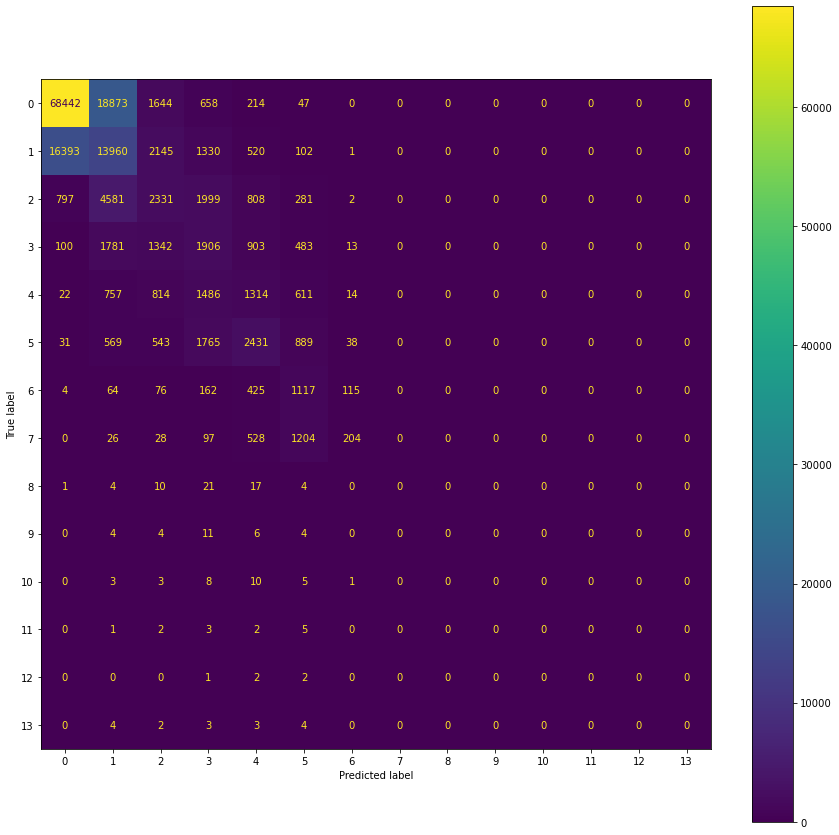

In [125]:
cm_rf_train = confusion_matrix(y_train, train_pred_int_rf)
disp_rf_train = ConfusionMatrixDisplay(cm_rf_train)

fig, ax = plt.subplots(figsize=(15,15))

disp_rf_train.plot(ax = ax)
plt.show()

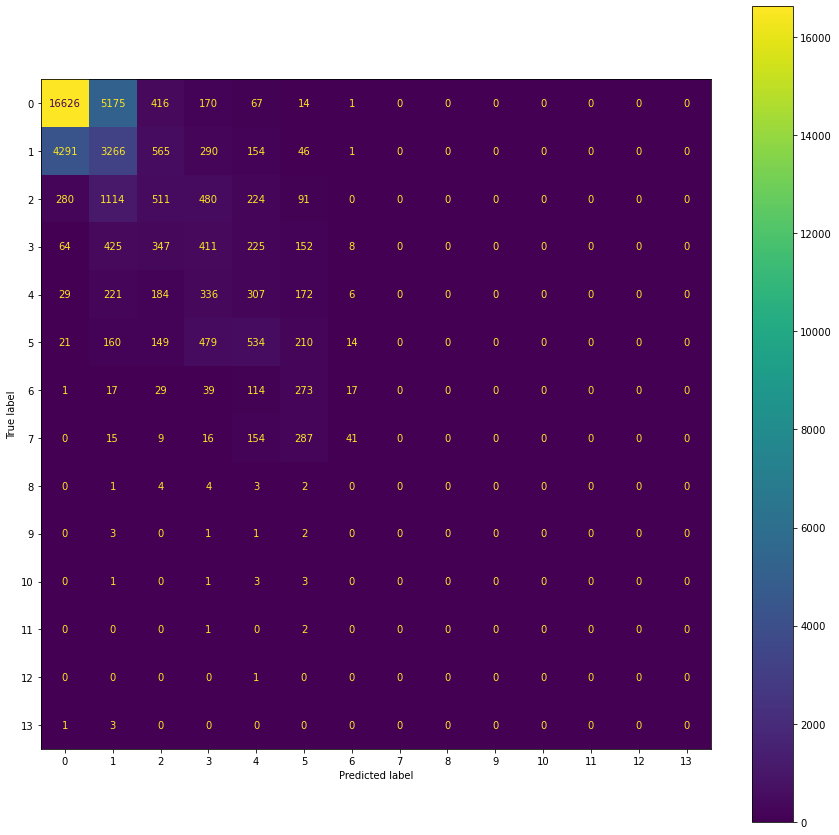

In [126]:
cm_rf_test = confusion_matrix(y_test, test_pred_int_rf)
disp_rf_test = ConfusionMatrixDisplay(cm_rf_test)

fig, ax = plt.subplots(figsize=(15,15))

disp_rf_test.plot(ax = ax)
plt.show()

In [164]:
rf_features = pd.DataFrame({'col_name': best_rf.feature_importances_},
                             index=X_train.columns).sort_values(by='col_name', ascending=False)

# rf_features[tree_features.col_name > 0.001]

Text(0.5, 1.0, 'Random Forest Feature Importance')

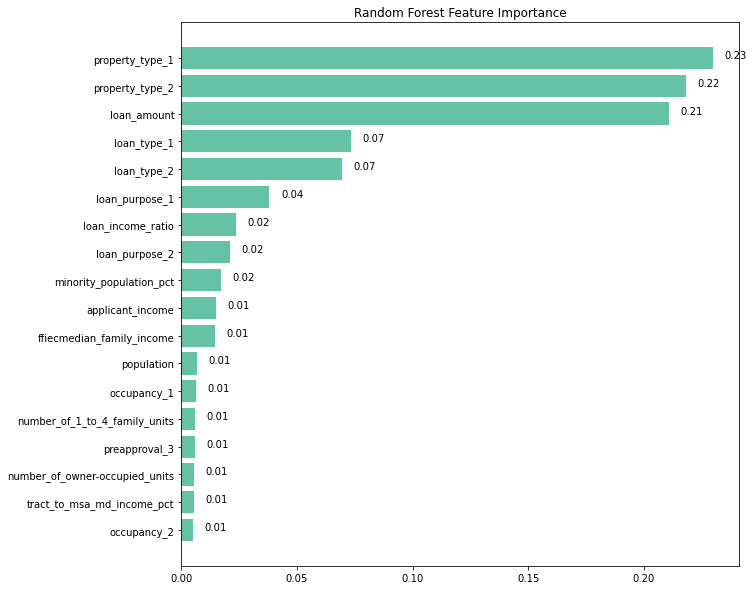

In [163]:
scores = rf_features[rf_features.col_name > 0.005].col_name.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
    
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(width, scores)
    
for index, value in enumerate(scores):
    plt.text(value +0.005 , index, str(round(value,2)))
    
plt.yticks(width, ticks)    
plt.title('Random Forest Feature Importance')

## Extra

In [144]:
lender_rate_spread = data.groupby('lender').filter(lambda x: len(x) > 10)
lender_avg_rate_spread_lst = []
for lender in set(lender_rate_spread.lender.tolist()):
    avg = lender_rate_spread[lender_rate_spread['lender'] == lender].rate_spread.mean()
    total = len(lender_rate_spread[lender_rate_spread['lender'] == lender])
    lender_avg_rate_spread_dict = {'lender':lender,'rate_spread_avg': avg, 'number': total }
    lender_avg_rate_spread_lst.append(lender_avg_rate_spread_dict)
    
lender_avg_rate_spread_df = pd.DataFrame(lender_avg_rate_spread_lst)
    

,lender,rate_spread_avg,number
0,2,1.312500,16
1,3,1.000000,17
2,4,2.416667,24
3,5,1.800000,20
4,7,3.666667,12
...,...,...,...
1675,4275,1.666667,12
1676,4276,1.825397,63
1677,4277,1.076923,13
1678,4278,1.148148,27


In [158]:
lender_avg_rate_spread_df.sort_values('number', ascending=False)
lender_avg_rate_spread_df["Loan_number_group"] = pd.cut(x=lender_avg_rate_spread_df["number"],
                              bins=[10, 50, 300, 10000],
                              labels=["Lower", "Middle", "High"]
                             )

<AxesSubplot:xlabel='lender', ylabel='rate_spread_avg'>

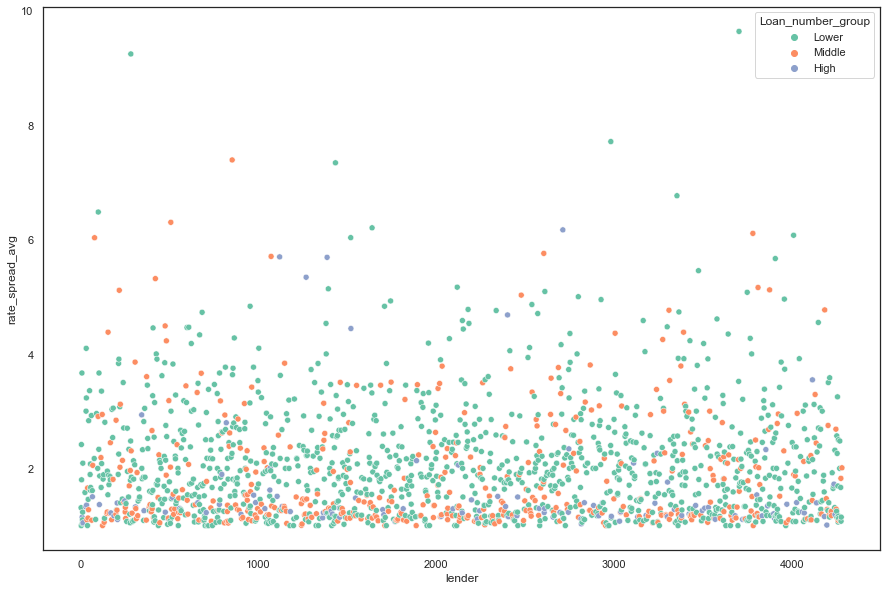

In [159]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data = lender_avg_rate_spread_df, x = 'lender', y = 'rate_spread_avg', hue = 'Loan_number_group')

<AxesSubplot:xlabel='county_code', ylabel='Count'>

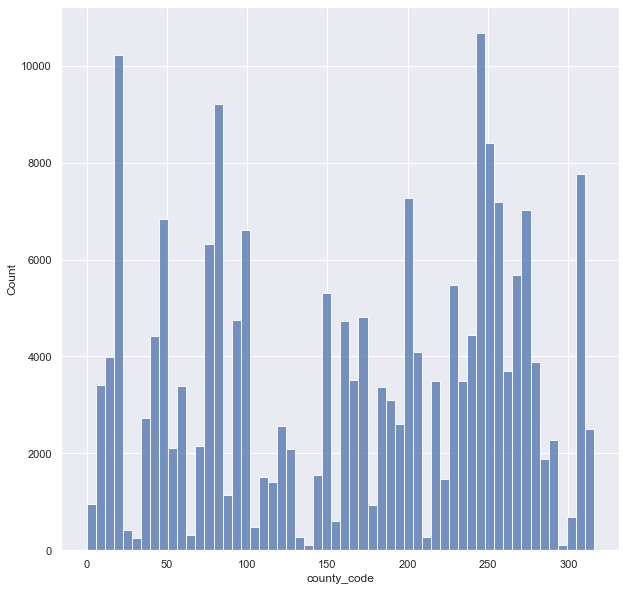

In [179]:
sns.histplot(data = data, x = 'county_code')

<AxesSubplot:xlabel='lender', ylabel='Count'>

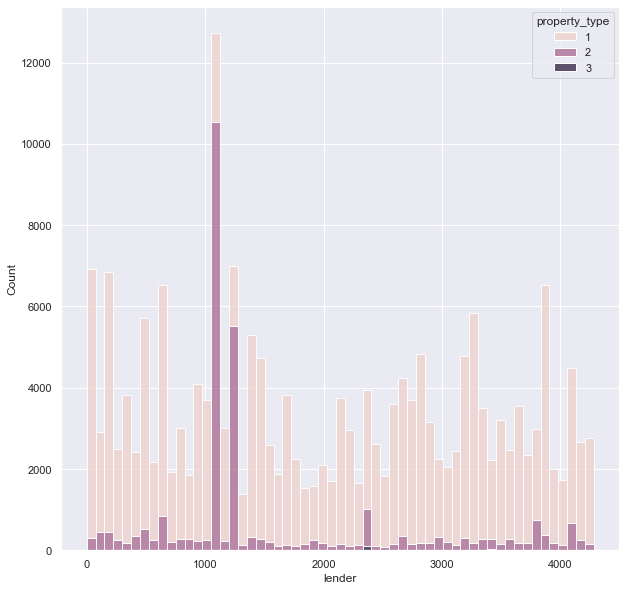

In [189]:
sns.histplot(data = data, x = 'lender', hue = 'property_type', multiple="stack")

<AxesSubplot:xlabel='lender', ylabel='Count'>

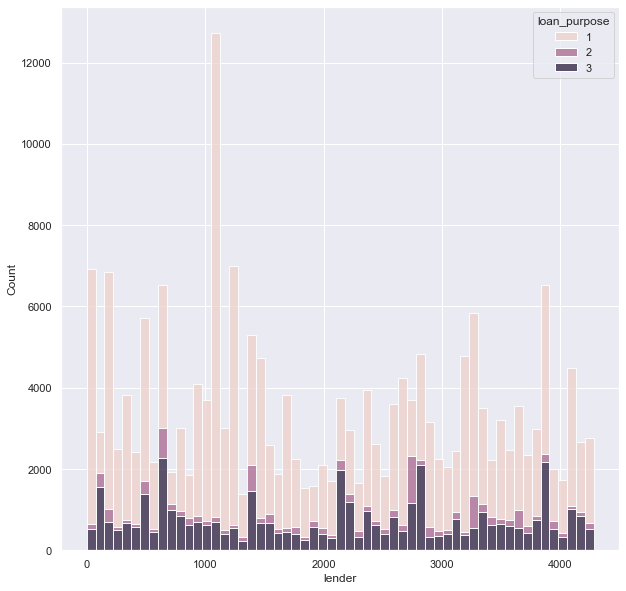

In [190]:
sns.histplot(data = data, x = 'lender', hue = 'loan_purpose', multiple="stack")

<AxesSubplot:xlabel='lender', ylabel='Count'>

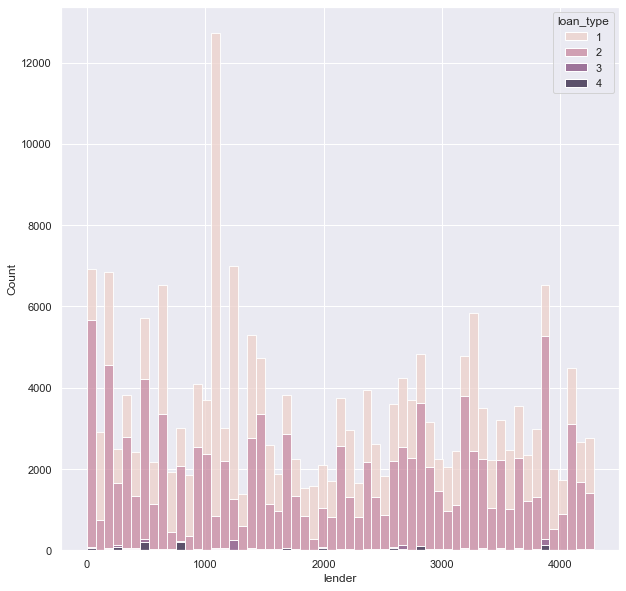

In [191]:
sns.histplot(data = data, x = 'lender', hue = 'loan_type', multiple="stack")